

> Librerías



In [5]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import zipfile
import requests
import os
from google.colab import drive, files

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neural_network import MLPClassifier



> Leer los datos



In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#datos abiertos
df_datosabiertos = pd.read_csv("/content/drive/MyDrive/Prueba/Datosabiertos.csv")

In [8]:
#datos UCI
df_datosUCI = pd.read_csv("/content/drive/MyDrive/Prueba/DatosUCI.csv",sep=";")

# Fase 2: Entendimiento de los datos

##Datos abiertos

In [9]:
df_datosabiertos.head()

DESCRIPCION NOMBRE_FACULTAD NOMBRE_PROGRAMA JORNADA  \
0  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
1  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
2  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
3  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
4  PRIMER  SEMESTRE DE 2019        CIENCIAS          FISICA  DIURNO   

    MODALIDAD NOMBRE_SEDE TIPO_IDEN_EST LUG_EXPEDICION LUGAR_NACIMIENTO  \
0  PRESENCIAL       TUNJA             C  VILLAVICENCIO    VILLAVICENCIO   
1  PRESENCIAL       TUNJA             C       SOGAMOSO         SOGAMOSO   
2  PRESENCIAL       TUNJA             C       SOGAMOSO         SOGAMOSO   
3  PRESENCIAL       TUNJA             C          TUNJA         PAMPLONA   
4  PRESENCIAL       TUNJA             T       SIMIJACA         SIMIJACA   

         FECHA_NACIMIENTO SEXO  ESTRATO                       NOMBRE_ESTADO  
0  04/17/1997 12:00:00 AM    M      3.0  PERDIO CUPO A130/98 ART. 80 LIT. B  
1  12/17/1994 12:00:00 AM    M      1.0  PERDIO CUPO A130/98 ART. 80 LIT. C  
2  05/30/2000 12:00:00 AM    M      3.0  PERDIO CUPO A130/98 ART. 80 LIT. C  
3  12/04/1994 12:00:00 AM    M      3.0   PERDIO CUPO A130/98 ART.80 LIT. E  
4  01/06/2000 12:00:00 AM    F      2.0  PERDIO CUPO A130/98 ART. 80 LIT. B

In [10]:
df_datosabiertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DESCRIPCION       337 non-null    object 
 1   NOMBRE_FACULTAD   337 non-null    object 
 2   NOMBRE_PROGRAMA   337 non-null    object 
 3   JORNADA           317 non-null    object 
 4   MODALIDAD         337 non-null    object 
 5   NOMBRE_SEDE       337 non-null    object 
 6   TIPO_IDEN_EST     337 non-null    object 
 7   LUG_EXPEDICION    337 non-null    object 
 8   LUGAR_NACIMIENTO  337 non-null    object 
 9   FECHA_NACIMIENTO  337 non-null    object 
 10  SEXO              337 non-null    object 
 11  ESTRATO           201 non-null    float64
 12  NOMBRE_ESTADO     337 non-null    object 
dtypes: float64(1), object(12)
memory usage: 34.4+ KB




> Codificar con one hot encoder


In [11]:
categorical_columns = [ 'DESCRIPCION', 'NOMBRE_FACULTAD', 'NOMBRE_PROGRAMA', 'JORNADA', 'MODALIDAD', 'NOMBRE_SEDE', 'TIPO_IDEN_EST', 'LUG_EXPEDICION',
                        'LUGAR_NACIMIENTO', 'FECHA_NACIMIENTO', 'SEXO','NOMBRE_ESTADO']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_datosabiertos[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_datosabiertosCod = pd.concat([df_datosabiertos.drop(columns=categorical_columns), encoded_df], axis=1)
df_datosabiertosCod.head()

ESTRATO  DESCRIPCION_PRIMER  SEMESTRE DE 2019  NOMBRE_FACULTAD_CIENCIAS  \
0      3.0                                   1.0                       1.0   
1      1.0                                   1.0                       1.0   
2      3.0                                   1.0                       1.0   
3      3.0                                   1.0                       1.0   
4      2.0                                   1.0                       1.0   

   NOMBRE_FACULTAD_CIENCIAS AGROPECUARIAS  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   NOMBRE_FACULTAD_CIENCIAS DE LA EDUCACION  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   NOMBRE_FACULTAD_CIENCIAS DE LA SALUD  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   NOMBRE_FACULTAD_CIENCIAS ECONOMICAS Y ADMINISTRATIVAS  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   NOMBRE_FACULTAD_DERECHO Y CIENCIAS  SOCIALES  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   NOMBRE_FACULTAD_ESTUDIOS A DISTANCIA  NOMBRE_FACULTAD_INGENIERIA  ...  \
0                                   0.0                         0.0  ...   
1                                   0.0                         0.0  ...   
2                                   0.0                         0.0  ...   
3                                   0.0                         0.0  ...   
4                                   0.0                         0.0  ...   

   FECHA_NACIMIENTO_12/31/1999 12:00:00 AM  SEXO_F  SEXO_M  \
0                                      0.0     0.0     1.0   
1                                      0.0     0.0     1.0   
2                                      0.0     0.0     1.0   
3                                      0.0     0.0     1.0   
4                                      0.0     1.0     0.0   

   NOMBRE_ESTADO_PERDIO CUPO A 052/2012  ART 15 LIT.A.  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   NOMBRE_ESTADO_PERDIO CUPO A 052/2012  ART 15 LIT.B.  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   NOMBRE_ESTADO_PERDIO CUPO A130/98 ART. 80 LIT. A  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   NOMBRE_ESTADO_PERDIO CUPO A130/98 ART. 80 LIT. B  \
0                                               1.0   
1                                               0.0   
2                            

In [12]:
def missing_values_table(dataset):
    total_missing_values = dataset.isnull().sum()

    missing_values_percent = 100 * total_missing_values / len(dataset)

    missing_values_table = pd.concat([total_missing_values, missing_values_percent], axis=1)
    missing_values_table = missing_values_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    missing_values_table = missing_values_table[missing_values_table['Missing Values'] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    print("Columns in dataset: " + str(dataset.shape[1]) + ".\n"
          "There are " + str(missing_values_table.shape[0]) + " columns that have missing values.")

    return missing_values_table

In [13]:
missing_values_table(df_datosabiertosCod)

Columns in dataset: 632.
There are 1 columns that have missing values.


Missing Values  % of Total Values
ESTRATO             136               40.4



> Descripción de las estadísticas descriptivas



In [14]:
def describir_datos(dataset):
    rows, cols = dataset.shape
    print(f'Rows: {rows} | Features: {cols}')
    print()
    print(dataset.describe())
    print()
    print('Data types:')
    print(dataset.dtypes)

In [15]:
describir_datos(df_datosabiertosCod)

Rows: 337 | Features: 632

          ESTRATO  DESCRIPCION_PRIMER  SEMESTRE DE 2019  \
count  201.000000                                 337.0   
mean     1.855721                                   1.0   
std      0.709986                                   0.0   
min      1.000000                                   1.0   
25%      1.000000                                   1.0   
50%      2.000000                                   1.0   
75%      2.000000                                   1.0   
max      4.000000                                   1.0   

       NOMBRE_FACULTAD_CIENCIAS  NOMBRE_FACULTAD_CIENCIAS AGROPECUARIAS  \
count                337.000000                              337.000000   
mean                   0.041543                                0.050445   
std                    0.199839                                0.219187   
min                    0.000000                                0.000000   
25%                    0.000000                                0.0

##Datos UCI

In [16]:
df_datosUCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [19]:
missing_values_table(df_datosUCI)

Columns in dataset: 37.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []



> Descripción de las estadísticas descriptivas de los datos



In [20]:
describir_datos(df_datosUCI)

Rows: 4424 | Features: 37

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000          



> Exploración de los datos



In [21]:
def histograma(dataset):
    dataset.hist(bins=15, figsize=(15, 10), grid=False)
    plt.tight_layout()
    plt.show()

<ipython-input-21-4a196a329769>:3: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


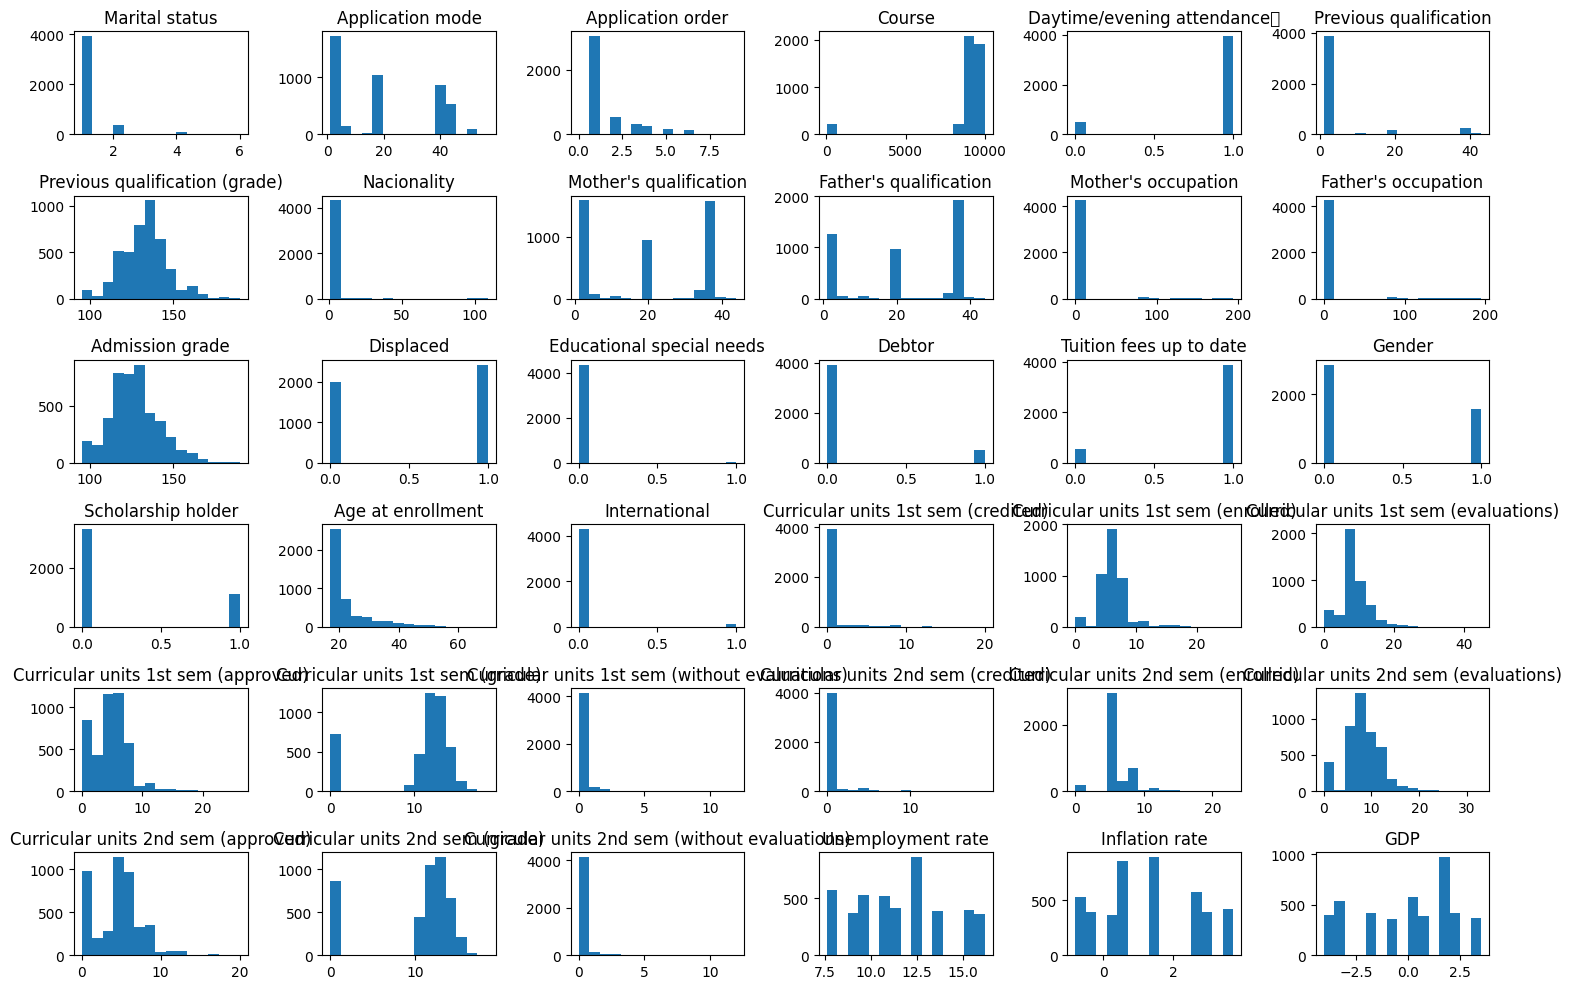

In [22]:
histograma(df_datosUCI)



> Matriz de correlación





> Codificar la columna Target con one hot encoder


In [23]:
cod_target = df_datosUCI[['Target']]
codificador = OneHotEncoder(sparse_output=False , handle_unknown='ignore' ,dtype=int);
resultados = codificador.fit_transform(cod_target)
df_codificado = pd.DataFrame(resultados, columns=codificador.get_feature_names_out(['Target']))

df_datosUCIcod = pd.concat([df_datosUCI.drop(['Target'], axis=1), df_codificado], axis=1)
df_datosUCIcod.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (evaluations)  \
0                      12  ...                                       0   
1                       3  ...                                       6   
2                      37  ...                                       0   
3                      37  ...                                      10   
4                      38  ...                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target_Dropout  Target_Enrolled  Target_Graduate  
0             1.4  1.74               1                0                0  
1            -0.3  0.79               0                0                1  
2             1.4  1.74               1                0                0  
3            -0.8 -3.12               0                0                1  
4            -0.3  0.79               0                0                1  

[5 rows x 39 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


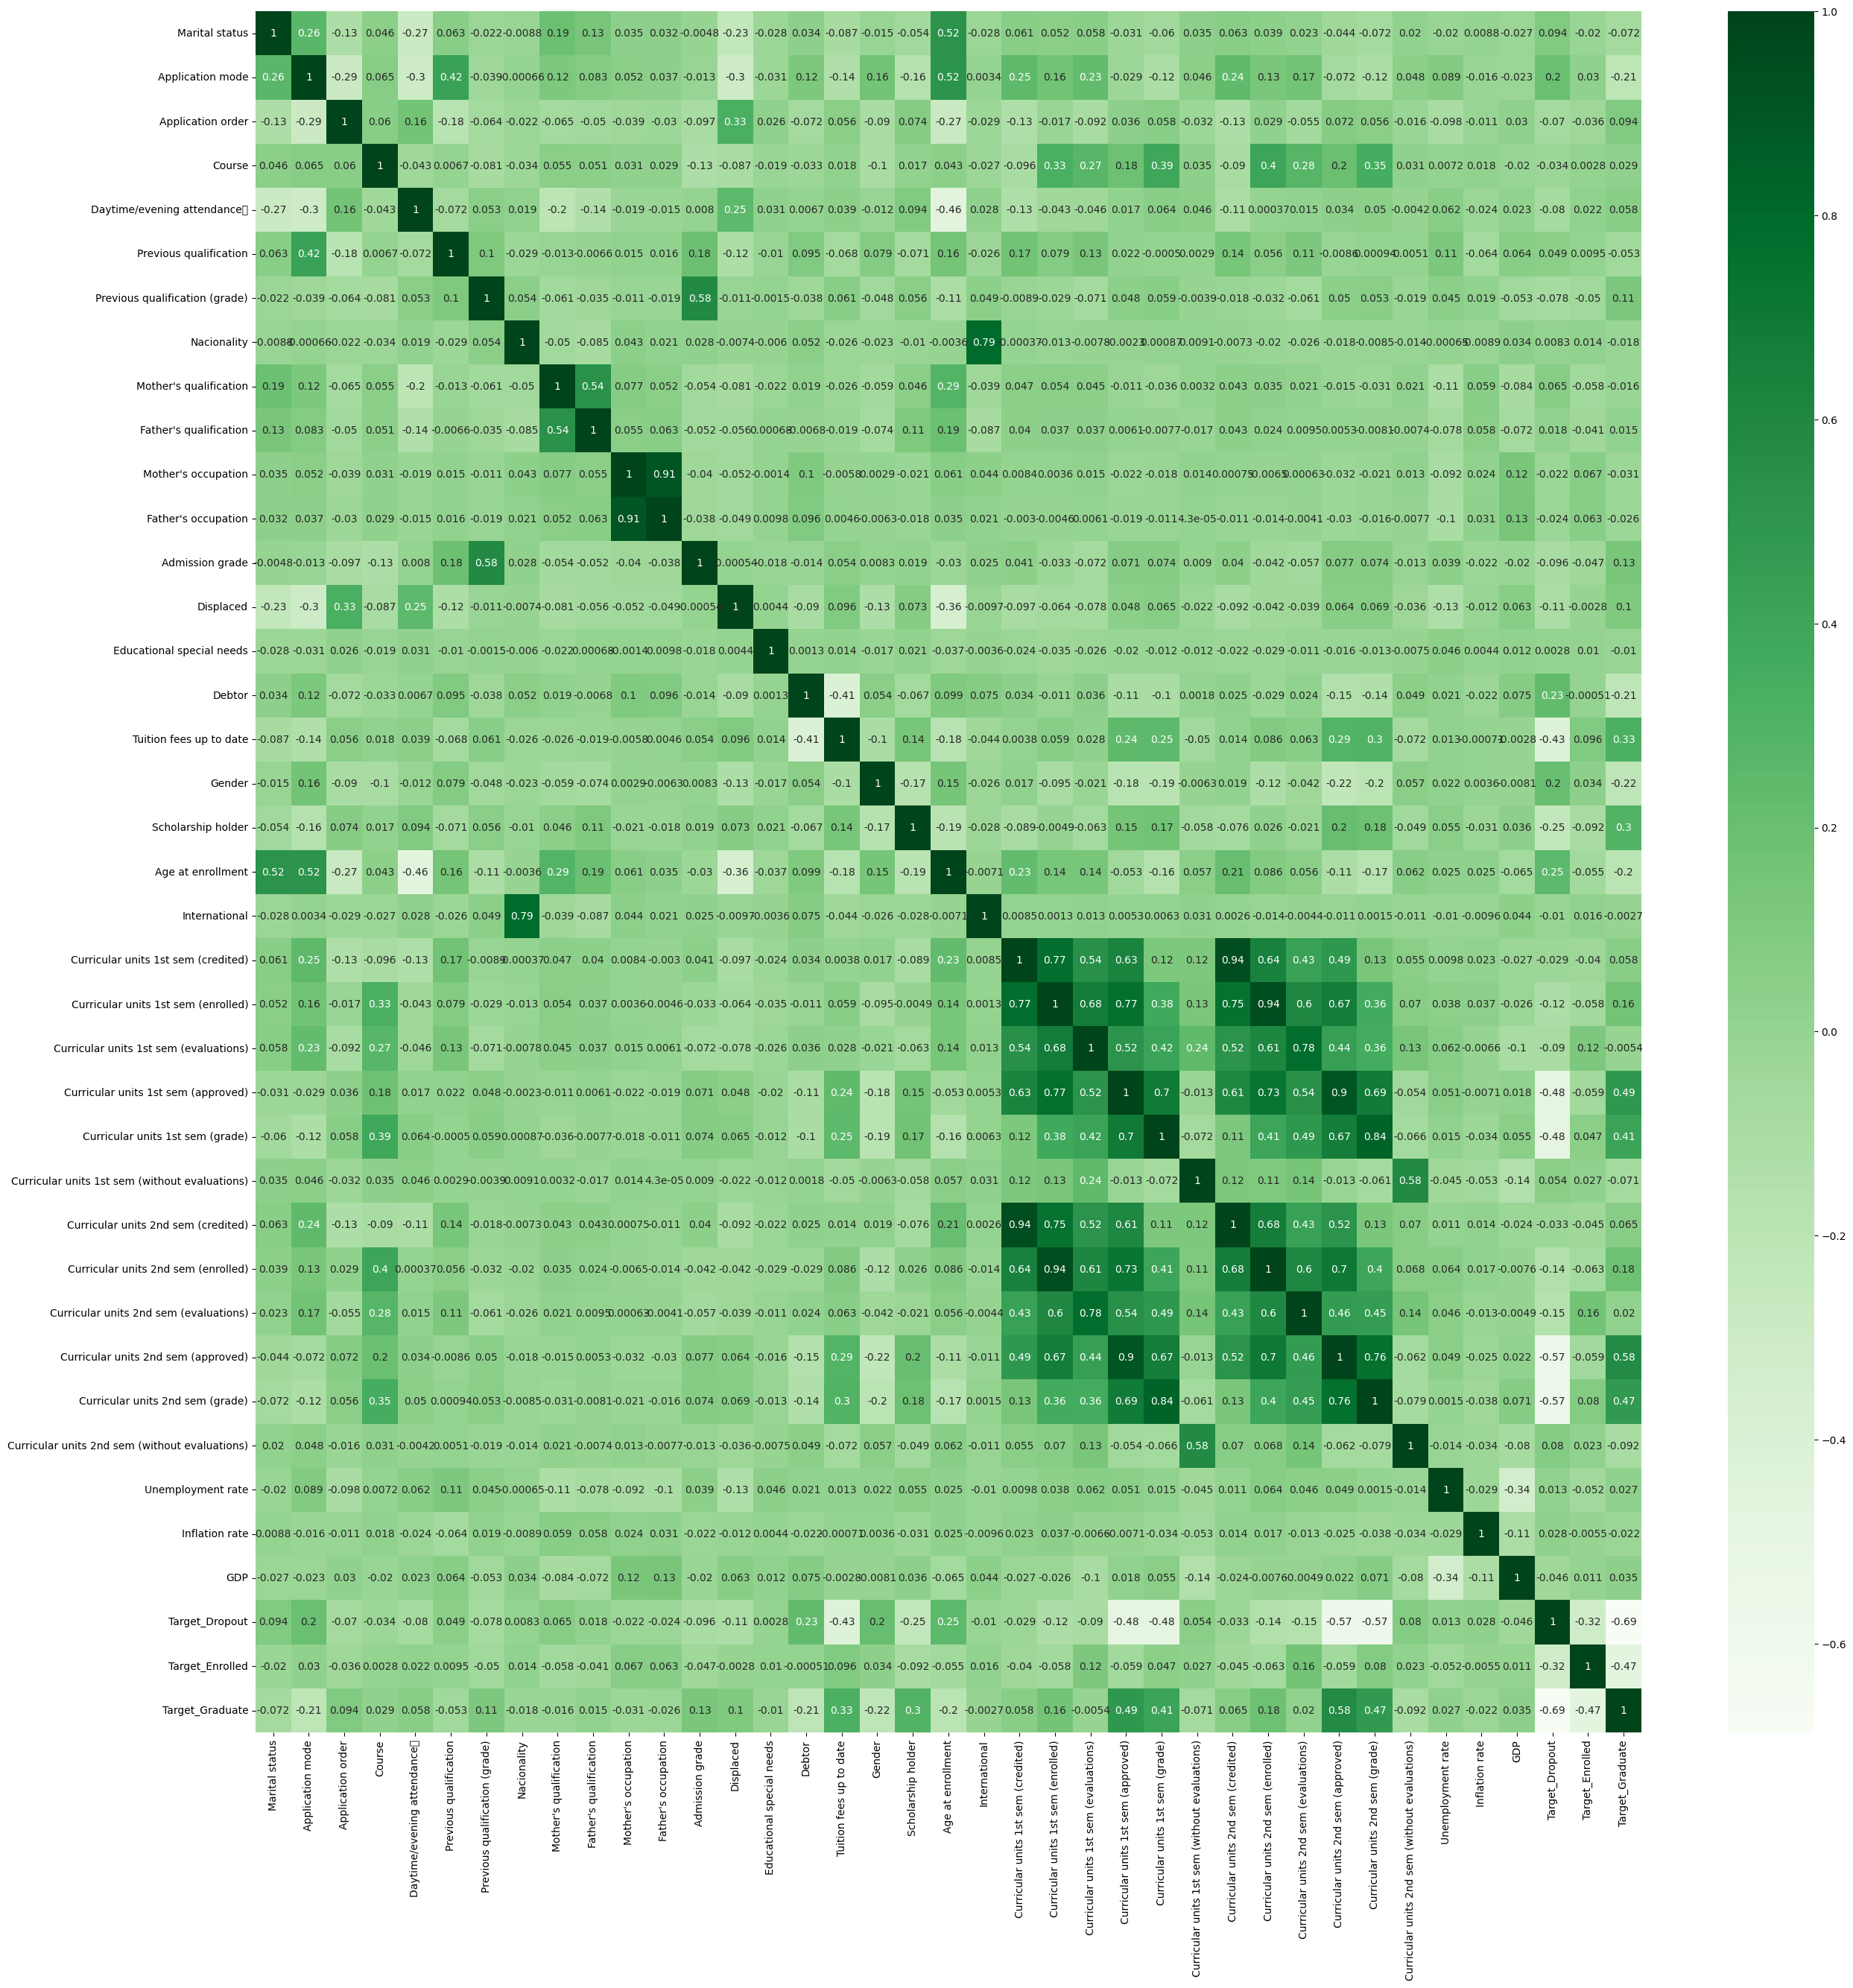

In [24]:
plt.rcParams["figure.figsize"]=(30,30)
df_corr=df_datosUCIcod.corr()
sns.heatmap(df_corr, cmap="Greens", annot = True)

In [25]:
def analisis_colum(dataset, target_column='Target_Dropout'):
    for column in dataset.columns:
        if column != target_column:
            print(f"\nAnálisis de la columna: {column}")
            grouped_counts = dataset.groupby([column, target_column]).size().unstack()
            print(grouped_counts)

In [26]:
analisis_colum(df_datosUCIcod)


Análisis de la columna: Marital status
Target_Dropout     0     1
Marital status            
1               2735  1184
2                200   179
3                  3     1
4                 49    42
5                 14    11
6                  2     4

Análisis de la columna: Application mode
Target_Dropout         0      1
Application mode               
1                 1363.0  345.0
2                    1.0    2.0
5                   14.0    2.0
7                   54.0   85.0
10                   7.0    3.0
15                  25.0    5.0
16                  33.0    5.0
17                 616.0  256.0
18                  79.0   45.0
26                   NaN    1.0
27                   NaN    1.0
39                 350.0  435.0
42                  43.0   34.0
43                 197.0  115.0
44                 150.0   63.0
51                  39.0   20.0
53                  31.0    4.0
57                   1.0    NaN

Análisis de la columna: Application order
Target_Dropout     

# Fase 3: Preparación de los datos

##Datos UCI

In [27]:
duplicates = df_datosUCIcod.duplicated()
print(duplicates.sum())
num_duplicates = duplicates.sum()
print(f"Se encontraron {num_duplicates} filas duplicadas.")
duplicated_rows = df_datosUCIcod[duplicates]
duplicated_rows

0
Se encontraron 0 filas duplicadas.


Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target_Dropout, Target_Enrolled, Target_Graduate]
Index: []

[0 rows x 39 columns]

In [28]:
df_datosUCIcod.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target_Dropout                                    0
Target_Enrolled                                   0
Target_Graduate                                   0
dtype: int64

### Codificación con Label

In [29]:
label_encoder = LabelEncoder()
df_datosUCIpreparado = df_datosUCI.copy()
df_datosUCIpreparado['Target'] = label_encoder.fit_transform(df_datosUCI['Target'])



0.   Dropout (Decersión)
1.   Enrrolled (Siguen estudiando)
2.   Graduate (Graduados)



In [30]:
df_datosUCIpreparado.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       2  
2             1.4  1.74       0  
3            -0.8 -3.12       2  
4            -0.3  0.79       2  

[5 rows x 37 columns]

In [31]:
target_counts = df_datosUCIpreparado['Target'].value_counts()
target_counts

Target
2    2209
0    1421
1     794
Name: count, dtype: int64




> Dividir los datos en entrenamiento y prueba









In [32]:
X = df_datosUCIpreparado.drop(['Target'], axis=1).copy()
y = df_datosUCIpreparado['Target']
X_train_Todas, X_test_Todas, y_train_Todas, y_test_Todas = train_test_split(X, y, test_size=0.2, random_state=42)



> Normalizar los datos



In [33]:
def scale_data(X_train, X_test=None, feature_range=(0, 1)):
    scaler = MinMaxScaler(feature_range=feature_range)

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    if X_test is not None:
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
        return X_train_scaled, X_test_scaled, scaler

    return X_train_scaled, scaler



> * Aplicar los datos normalizados al conjunto de prueba



In [34]:
X_train_scaled_Todas, X_test_scaled_Todas, scaler = scale_data(X_train_Todas, X_test_Todas)



> Balanceo de datos con Tomek Links



In [35]:
smote_tomek = SMOTETomek(random_state=42)
X_train_balancedTomek_Todas, y_train_balancedTomek_Todas = smote_tomek.fit_resample(X_train_scaled_Todas, y_train_Todas)

In [36]:
print("Distribución de las clases antes del balanceo:", y_train_Todas.value_counts())
print("Distribución de las clases después del balanceo:", y_train_balancedTomek_Todas.value_counts())

Distribución de las clases antes del balanceo: Target
2    1791
0    1105
1     643
Name: count, dtype: int64
Distribución de las clases después del balanceo: Target
1    1744
0    1733
2    1708
Name: count, dtype: int64


In [37]:
X_train_balancedTomek_Todas.describe()

Marital status  Application mode  Application order       Course  \
count     5185.000000       5185.000000        5185.000000  5185.000000   
mean         0.033903          0.329089           0.185975     0.885825   
std          0.110637          0.304130           0.134245     0.203941   
min          0.000000          0.000000           0.000000     0.000000   
25%          0.000000          0.000000           0.111111     0.909018   
50%          0.000000          0.285714           0.111111     0.924382   
75%          0.000000          0.678571           0.222222     0.953060   
max          1.000000          1.000000           1.000000     1.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   5185.000000             5185.000000   
mean                       0.886981                0.078299   
std                        0.314864                0.228389   
min                        0.000000                0.000000   
25%                        1.000000                0.000000   
50%                        1.000000                0.000000   
75%                        1.000000                0.000000   
max                        1.000000                1.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     5185.000000  5185.000000             5185.000000   
mean                         0.387269     0.006073                0.432742   
std                          0.130090     0.051918                0.364428   
min                          0.000000     0.000000                0.000000   
25%                          0.305263     0.000000                0.037154   
50%                          0.389474     0.000000                0.428571   
75%                          0.463158     0.000000                0.857143   
max                          1.000000     0.990741                1.000000   

       Father's qualification  ...  \
count             5185.000000  ...   
mean                 0.495017  ...   
std                  0.348671  ...   
min                  0.000000  ...   
25%                  0.046512  ...   
50%                  0.418605  ...   
75%                  0.837209  ...   
max                  1.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     5185.000000   
mean                                         0.011661   
std                                          0.053108   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Curricular units 2nd sem (credited)  \
count                          5185.000000   
mean                              0.024368   
std                               0.090490   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          5185.000000   
mean                              0.261987   
std                               0.087804   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.274761   
max                               1.000000   

       Curricular units 2nd sem (evaluations)  \
count                             5185.000000   
mean                                 0.247779   
std                                  0.118734   
min                                  0.000000   
25%                                  0.181818   
50%                                  0.242424   
75%                           

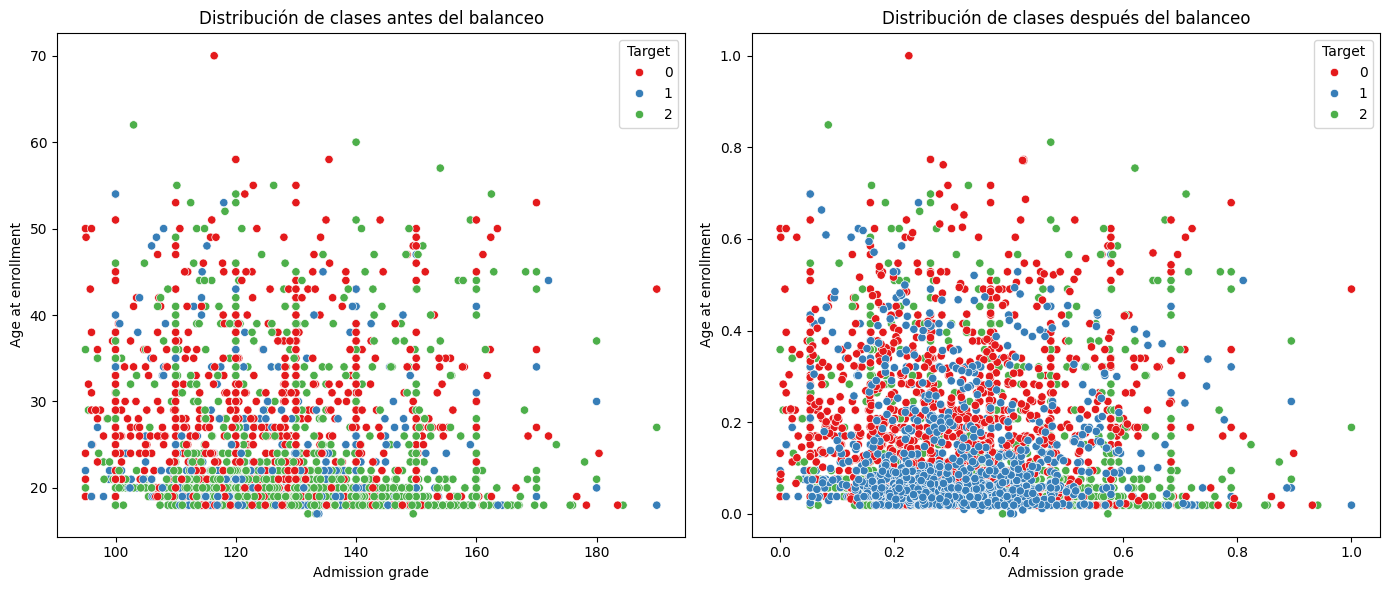

In [38]:
y_train_balancedTomek_Todas = pd.Series(y_train_balancedTomek_Todas.squeeze())

feature_x = 'Admission grade'
feature_y = 'Age at enrollment'

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.scatterplot(data=X_train_Todas, x=feature_x, y=feature_y, hue=y_train_Todas, palette='Set1')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

X_train_balanced_df = pd.DataFrame(X_train_balancedTomek_Todas, columns=X_train_Todas.columns)
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_train_balanced_df, x=feature_x, y=feature_y, hue=y_train_balancedTomek_Todas, palette='Set1')
plt.title('Distribución de clases después del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()

## Datos abiertos

In [39]:
df_datosabiertos['ESTRATO'].fillna(int(df_datosabiertos['ESTRATO'].mean()), inplace=True)

<ipython-input-39-50d1f0f7a1d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_datosabiertos['ESTRATO'].fillna(int(df_datosabiertos['ESTRATO'].mean()), inplace=True)


In [40]:
df_datosabiertos['JORNADA'].fillna(df_datosabiertos['JORNADA'].mode()[0], inplace=True)

<ipython-input-40-1fb9fcdfa82e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_datosabiertos['JORNADA'].fillna(df_datosabiertos['JORNADA'].mode()[0], inplace=True)


In [41]:
missing_values_table(df_datosabiertos)

Columns in dataset: 13.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [42]:
df_datosabiertos['SEXO'].unique()

array(['M', 'F'], dtype=object)

In [43]:
df_datosabiertos['JORNADA'].unique()

array(['DIURNO', 'OTRO', 'NOCTURNO'], dtype=object)

In [44]:
describir_datos(df_datosabiertos)

Rows: 337 | Features: 13

          ESTRATO
count  337.000000
mean     1.510386
std      0.690526
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      4.000000

Data types:
DESCRIPCION          object
NOMBRE_FACULTAD      object
NOMBRE_PROGRAMA      object
JORNADA              object
MODALIDAD            object
NOMBRE_SEDE          object
TIPO_IDEN_EST        object
LUG_EXPEDICION       object
LUGAR_NACIMIENTO     object
FECHA_NACIMIENTO     object
SEXO                 object
ESTRATO             float64
NOMBRE_ESTADO        object
dtype: object


# Fase 4: Modelado con todas las variables




## Entrenamiento con Random Forest



### Datos desbalanceados

In [45]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled_Todas, y_train_Todas)
y_pred = model.predict(X_test_scaled_Todas)

print("Accuracy score:", accuracy_score(y_test_Todas, y_pred))
print('Precision score: ', precision_score(y_test_Todas, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test_Todas, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test_Todas, y_pred, average='macro'))

print(classification_report(y_test_Todas, y_pred))

Accuracy score: 0.7593220338983051
Precision score:  0.6973359083936007
Recall score:  0.6604769006093069
F1 Score:  0.6674044740792014
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



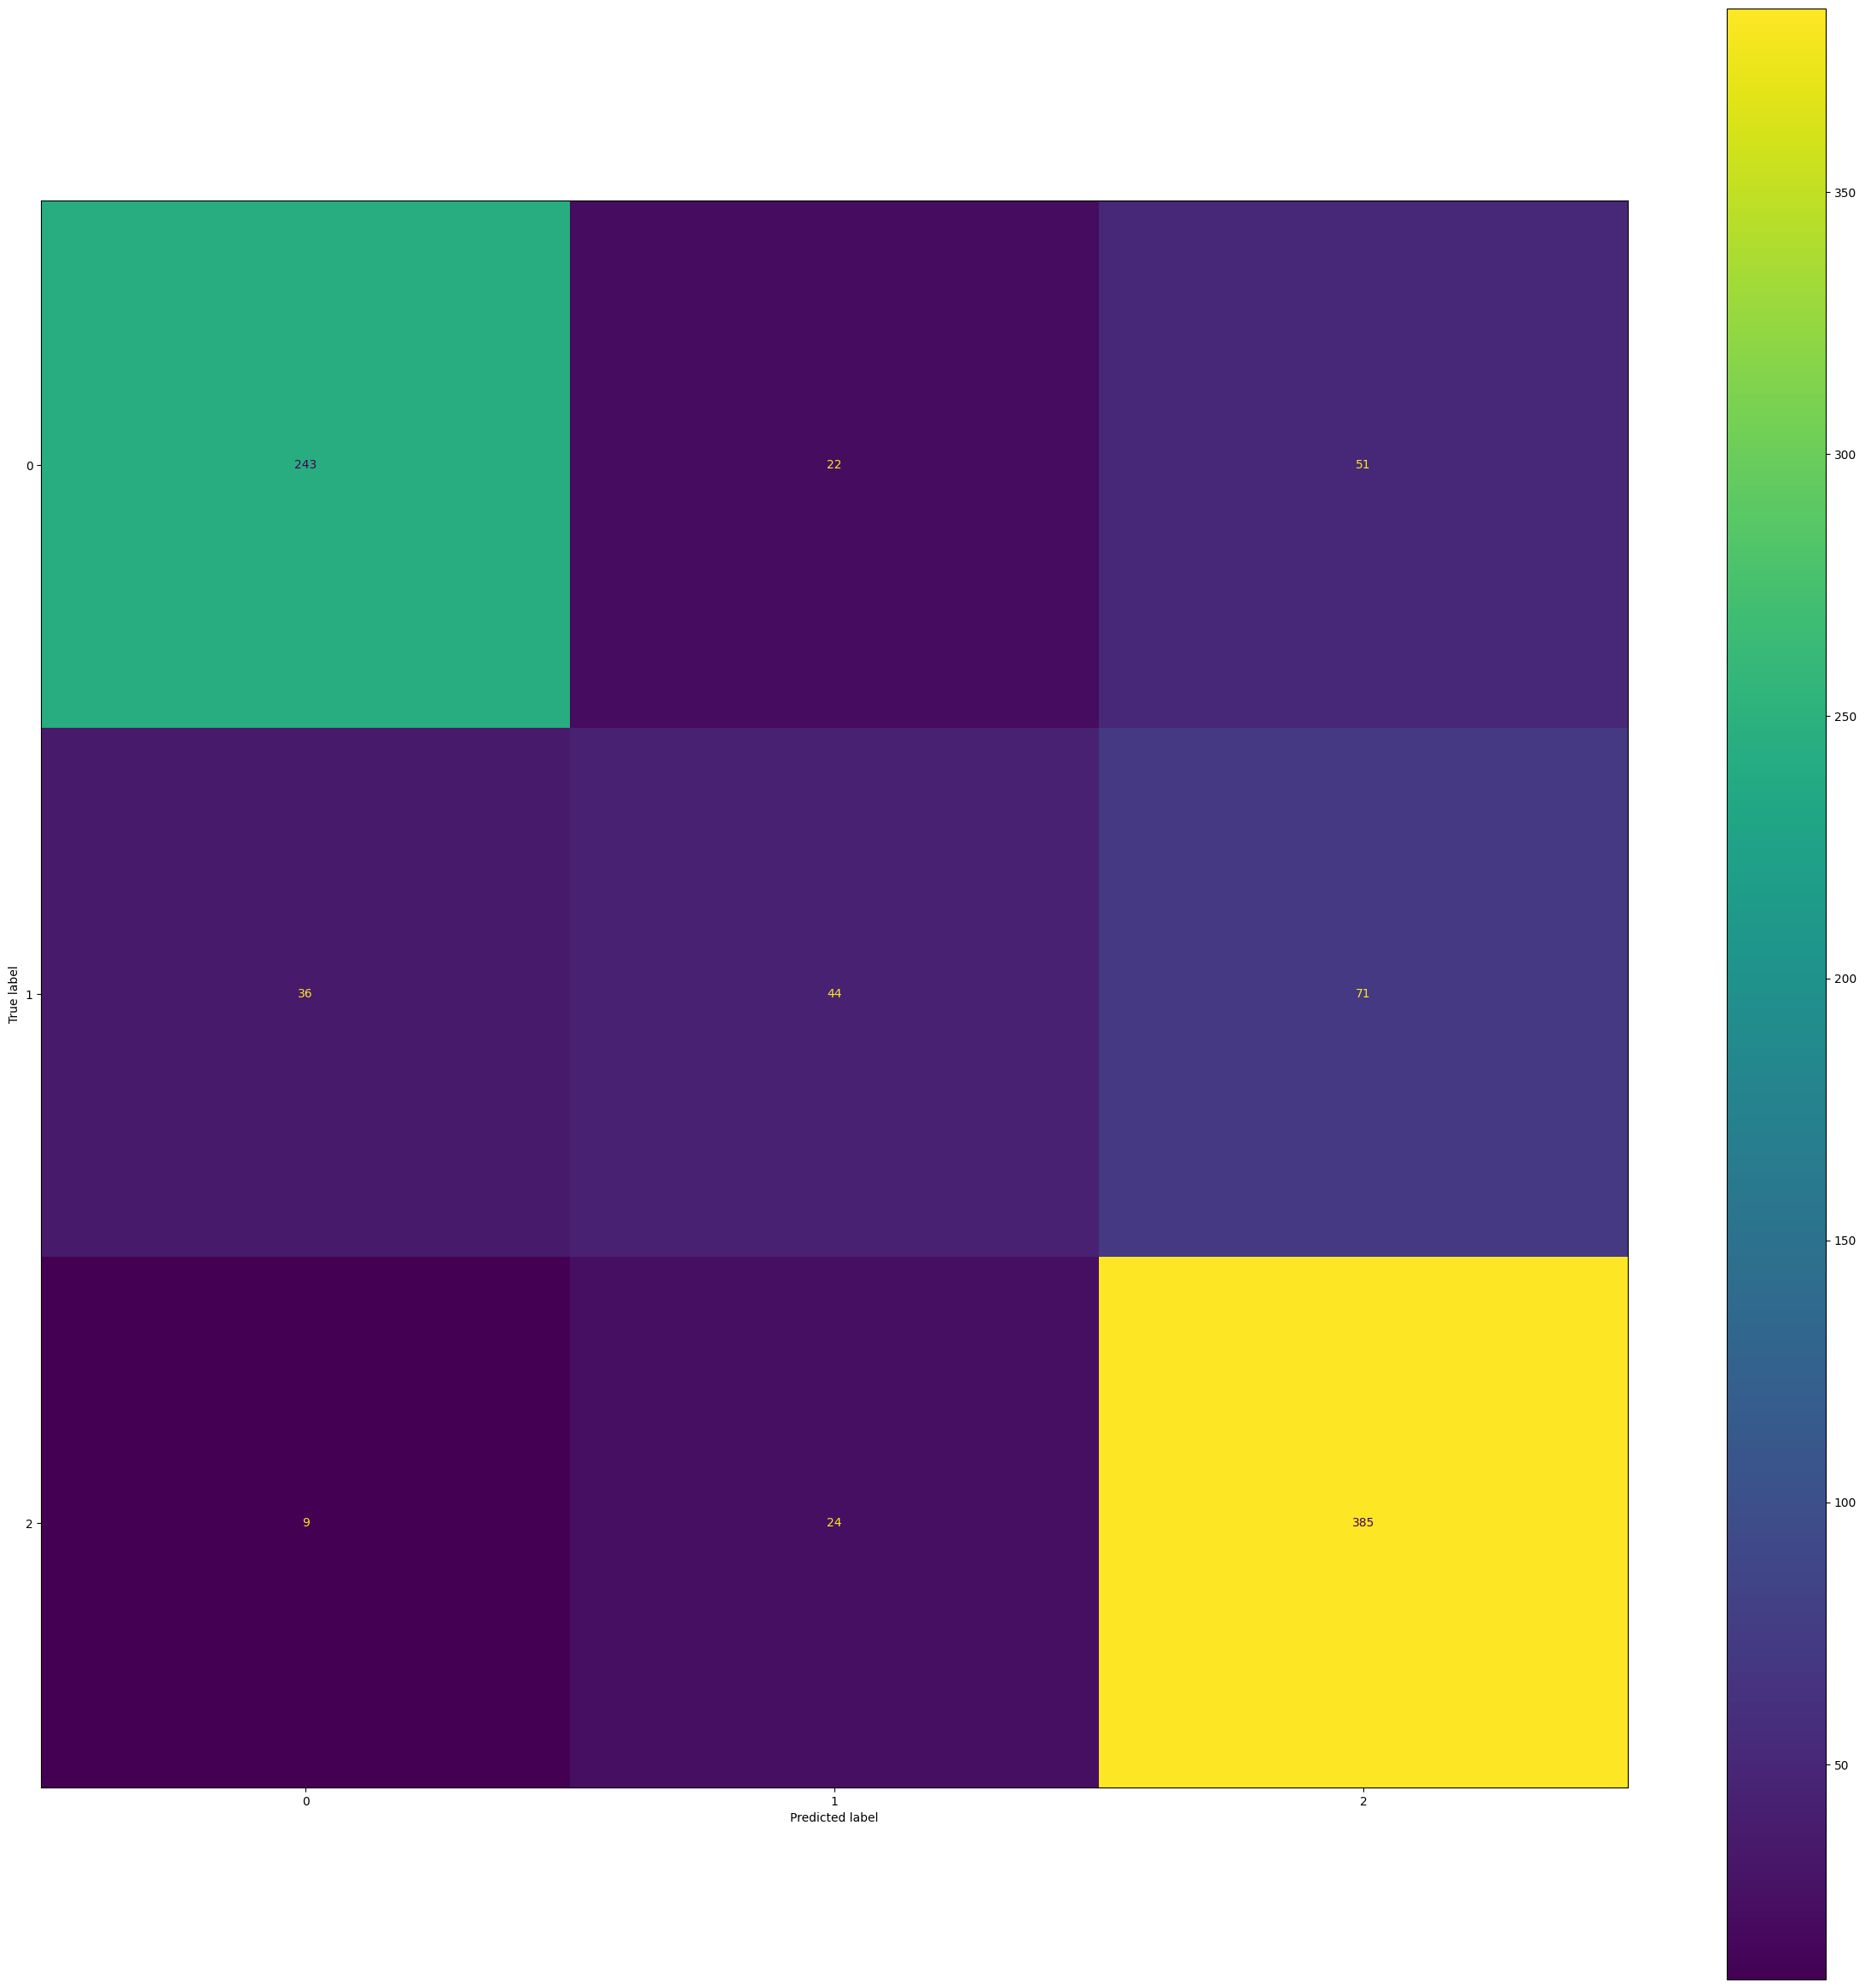

In [46]:
cm = confusion_matrix(y_test_Todas, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Datos con balanceado Tomek

In [47]:
modelTomek = RandomForestClassifier(random_state=42)
modelTomek.fit(X_train_balancedTomek_Todas, y_train_balancedTomek_Todas)
y_predRT = modelTomek.predict(X_test_scaled_Todas)

print("Accuracy:", accuracy_score(y_test_Todas, y_predRT))
print('Precision score: ', precision_score(y_test_Todas, y_predRT, average='macro'))
print('Recall score: ', recall_score(y_test_Todas, y_predRT, average='macro'))
print('F1 Score: ', f1_score(y_test_Todas, y_predRT, average='macro'))

print(classification_report(y_test_Todas, y_predRT))

Accuracy: 0.768361581920904
Precision score:  0.7169287746675493
Recall score:  0.7047936668884734
F1 Score:  0.7090887371152378
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       316
           1       0.50      0.48      0.49       151
           2       0.80      0.89      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.77      0.77      0.77       885



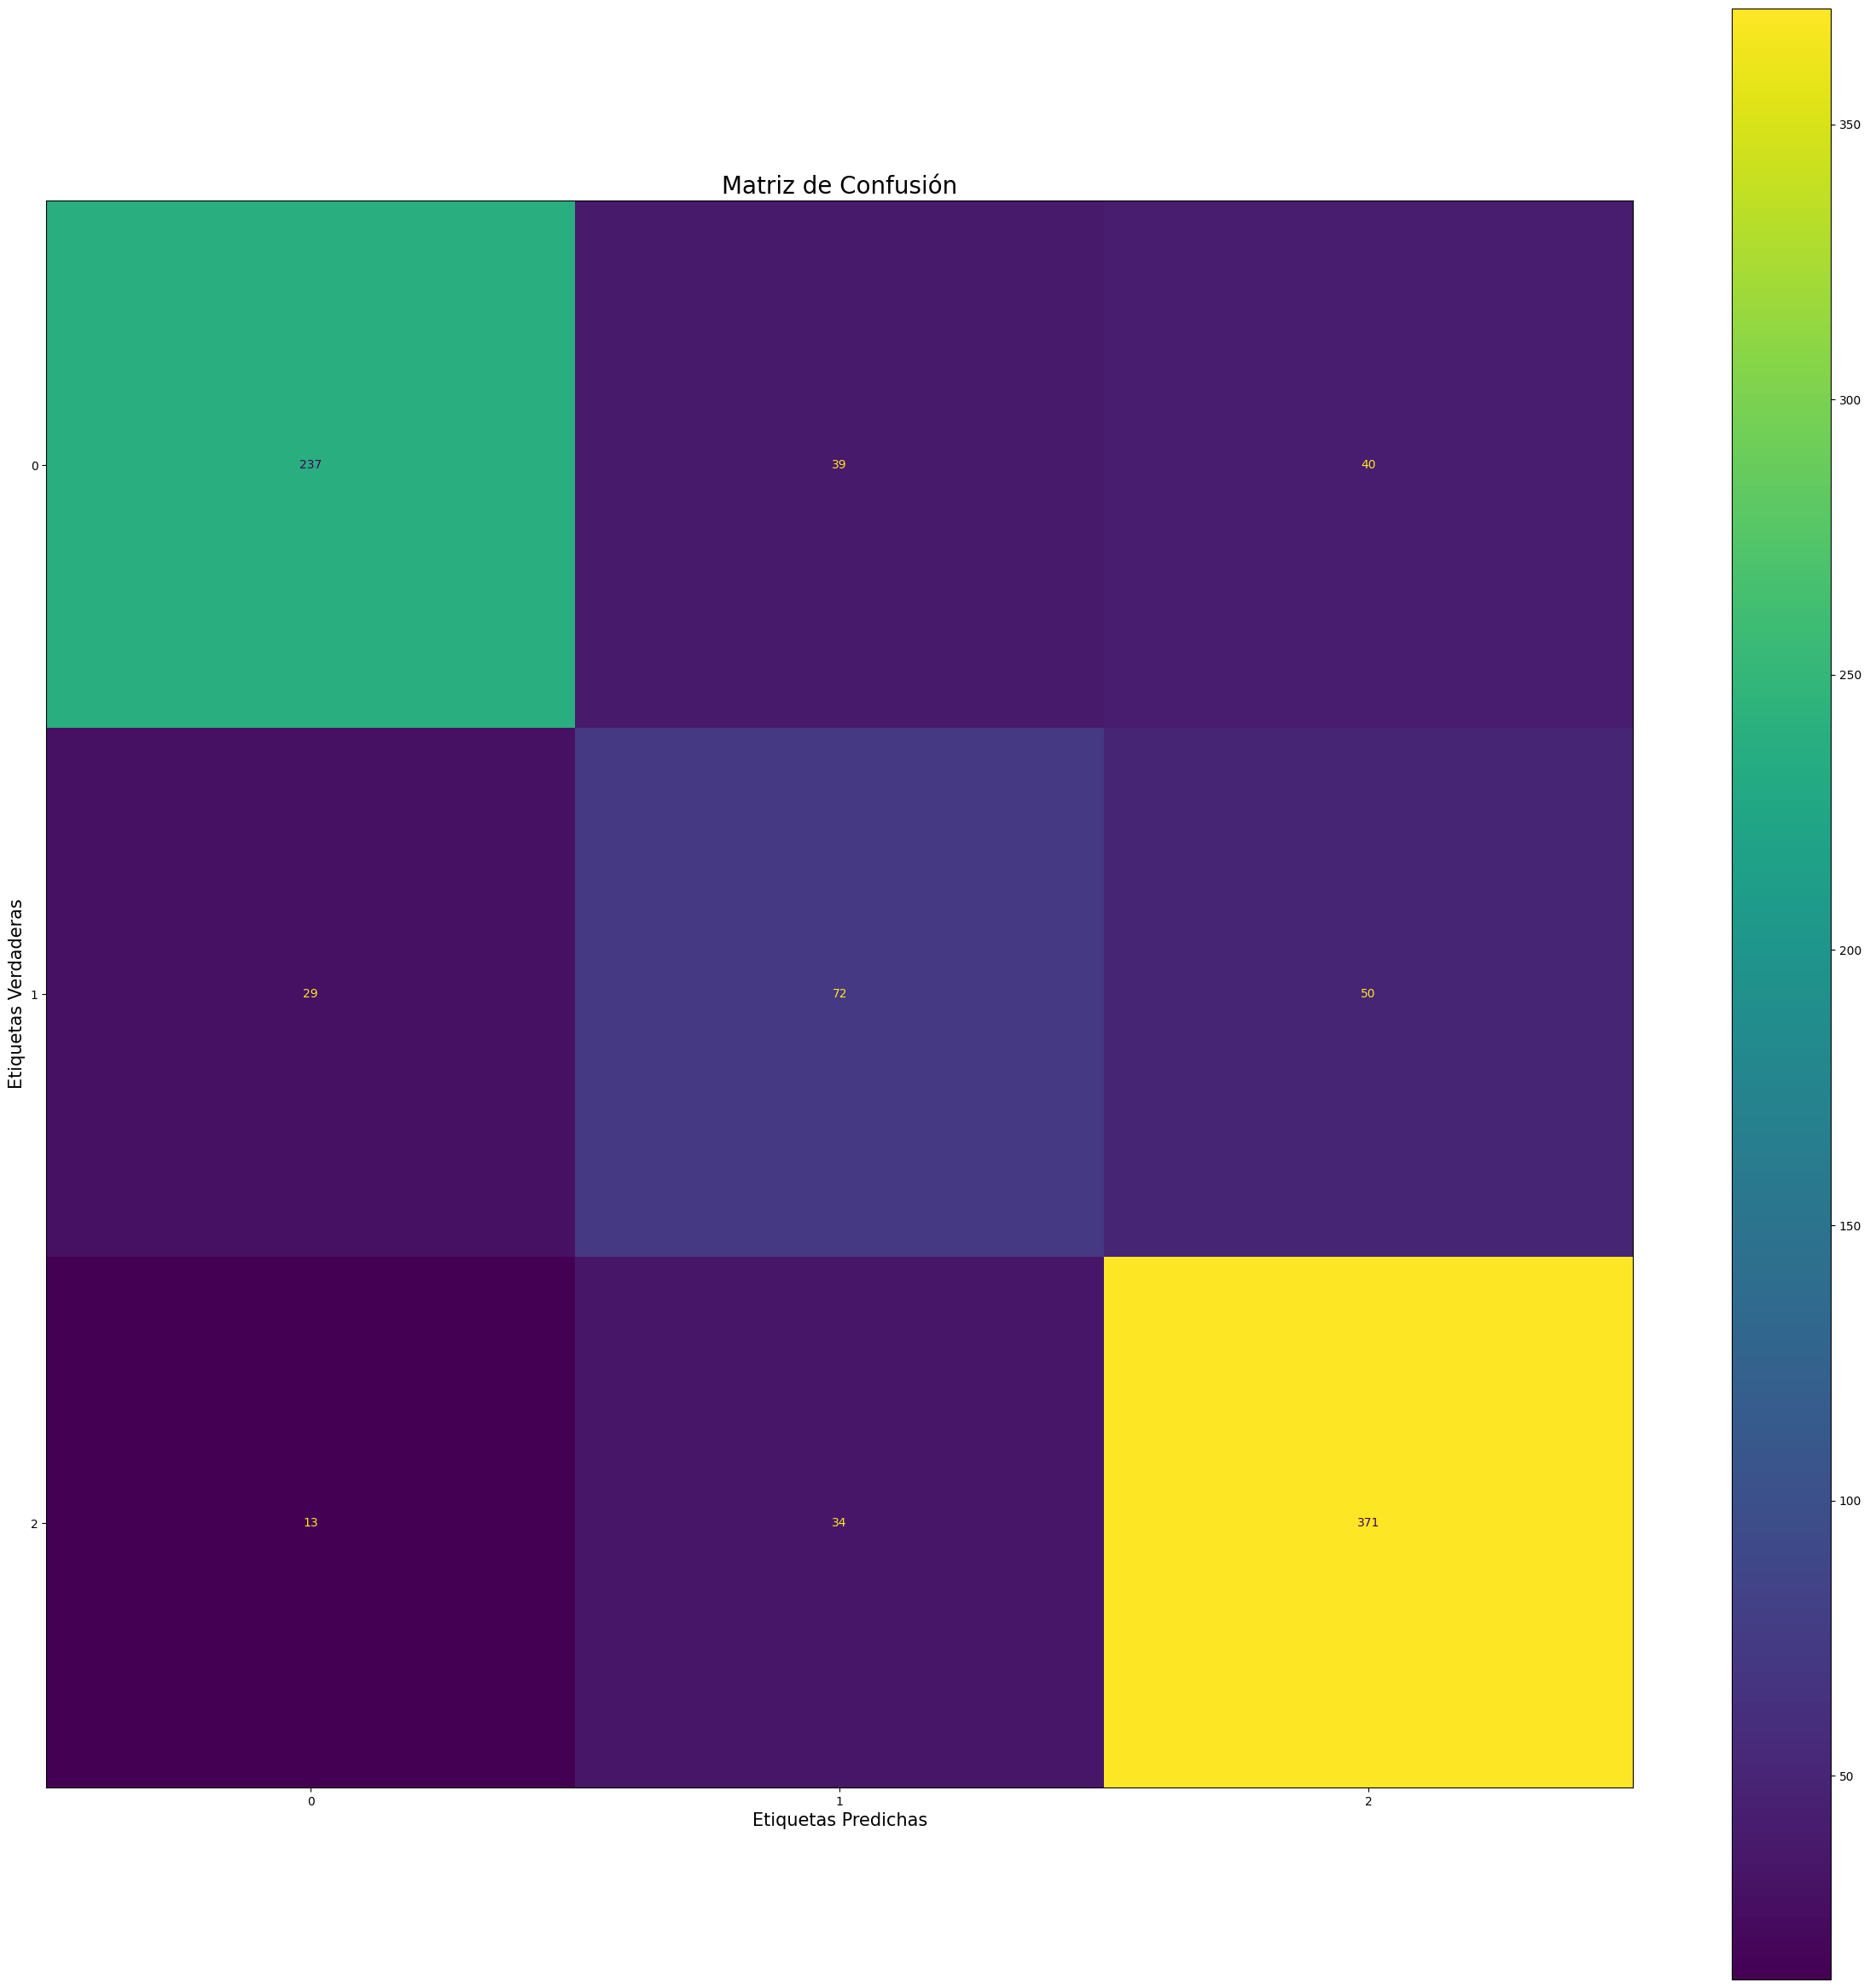

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_Todas, y_predRT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelTomek.classes_)
disp.plot(cmap='viridis')
plt.rcParams.update({'font.size': 20})  # Cambia el número según el tamaño deseado
plt.title('Matriz de Confusión', fontsize=20)  # Título
plt.xlabel('Etiquetas Predichas', fontsize=15)  # Eje X
plt.ylabel('Etiquetas Verdaderas', fontsize=15)  # Eje Y
plt.show()

## Entrenamiento con XGBoost

### Datos desbalanceados

In [49]:
import xgboost as xgb
modelXGB = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [50]:
modelXGB.fit(X_train_scaled_Todas, y_train_Todas)
y_predxgb = modelXGB.predict(X_test_scaled_Todas)

print("Accuracy score:", accuracy_score(y_test_Todas, y_predxgb))
print('Precision score: ', precision_score(y_test_Todas, y_predxgb, average='macro'))
print('Recall score: ', recall_score(y_test_Todas, y_predxgb, average='macro'))
print('F1 Score: ', f1_score(y_test_Todas, y_predxgb, average='macro'))

print(classification_report(y_test_Todas, y_predxgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:08:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy score: 0.7649717514124293
Precision score:  0.706044842905834
Recall score:  0.6733049262896914
F1 Score:  0.6814882080116514
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       316
           1       0.50      0.34      0.40       151
           2       0.77      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



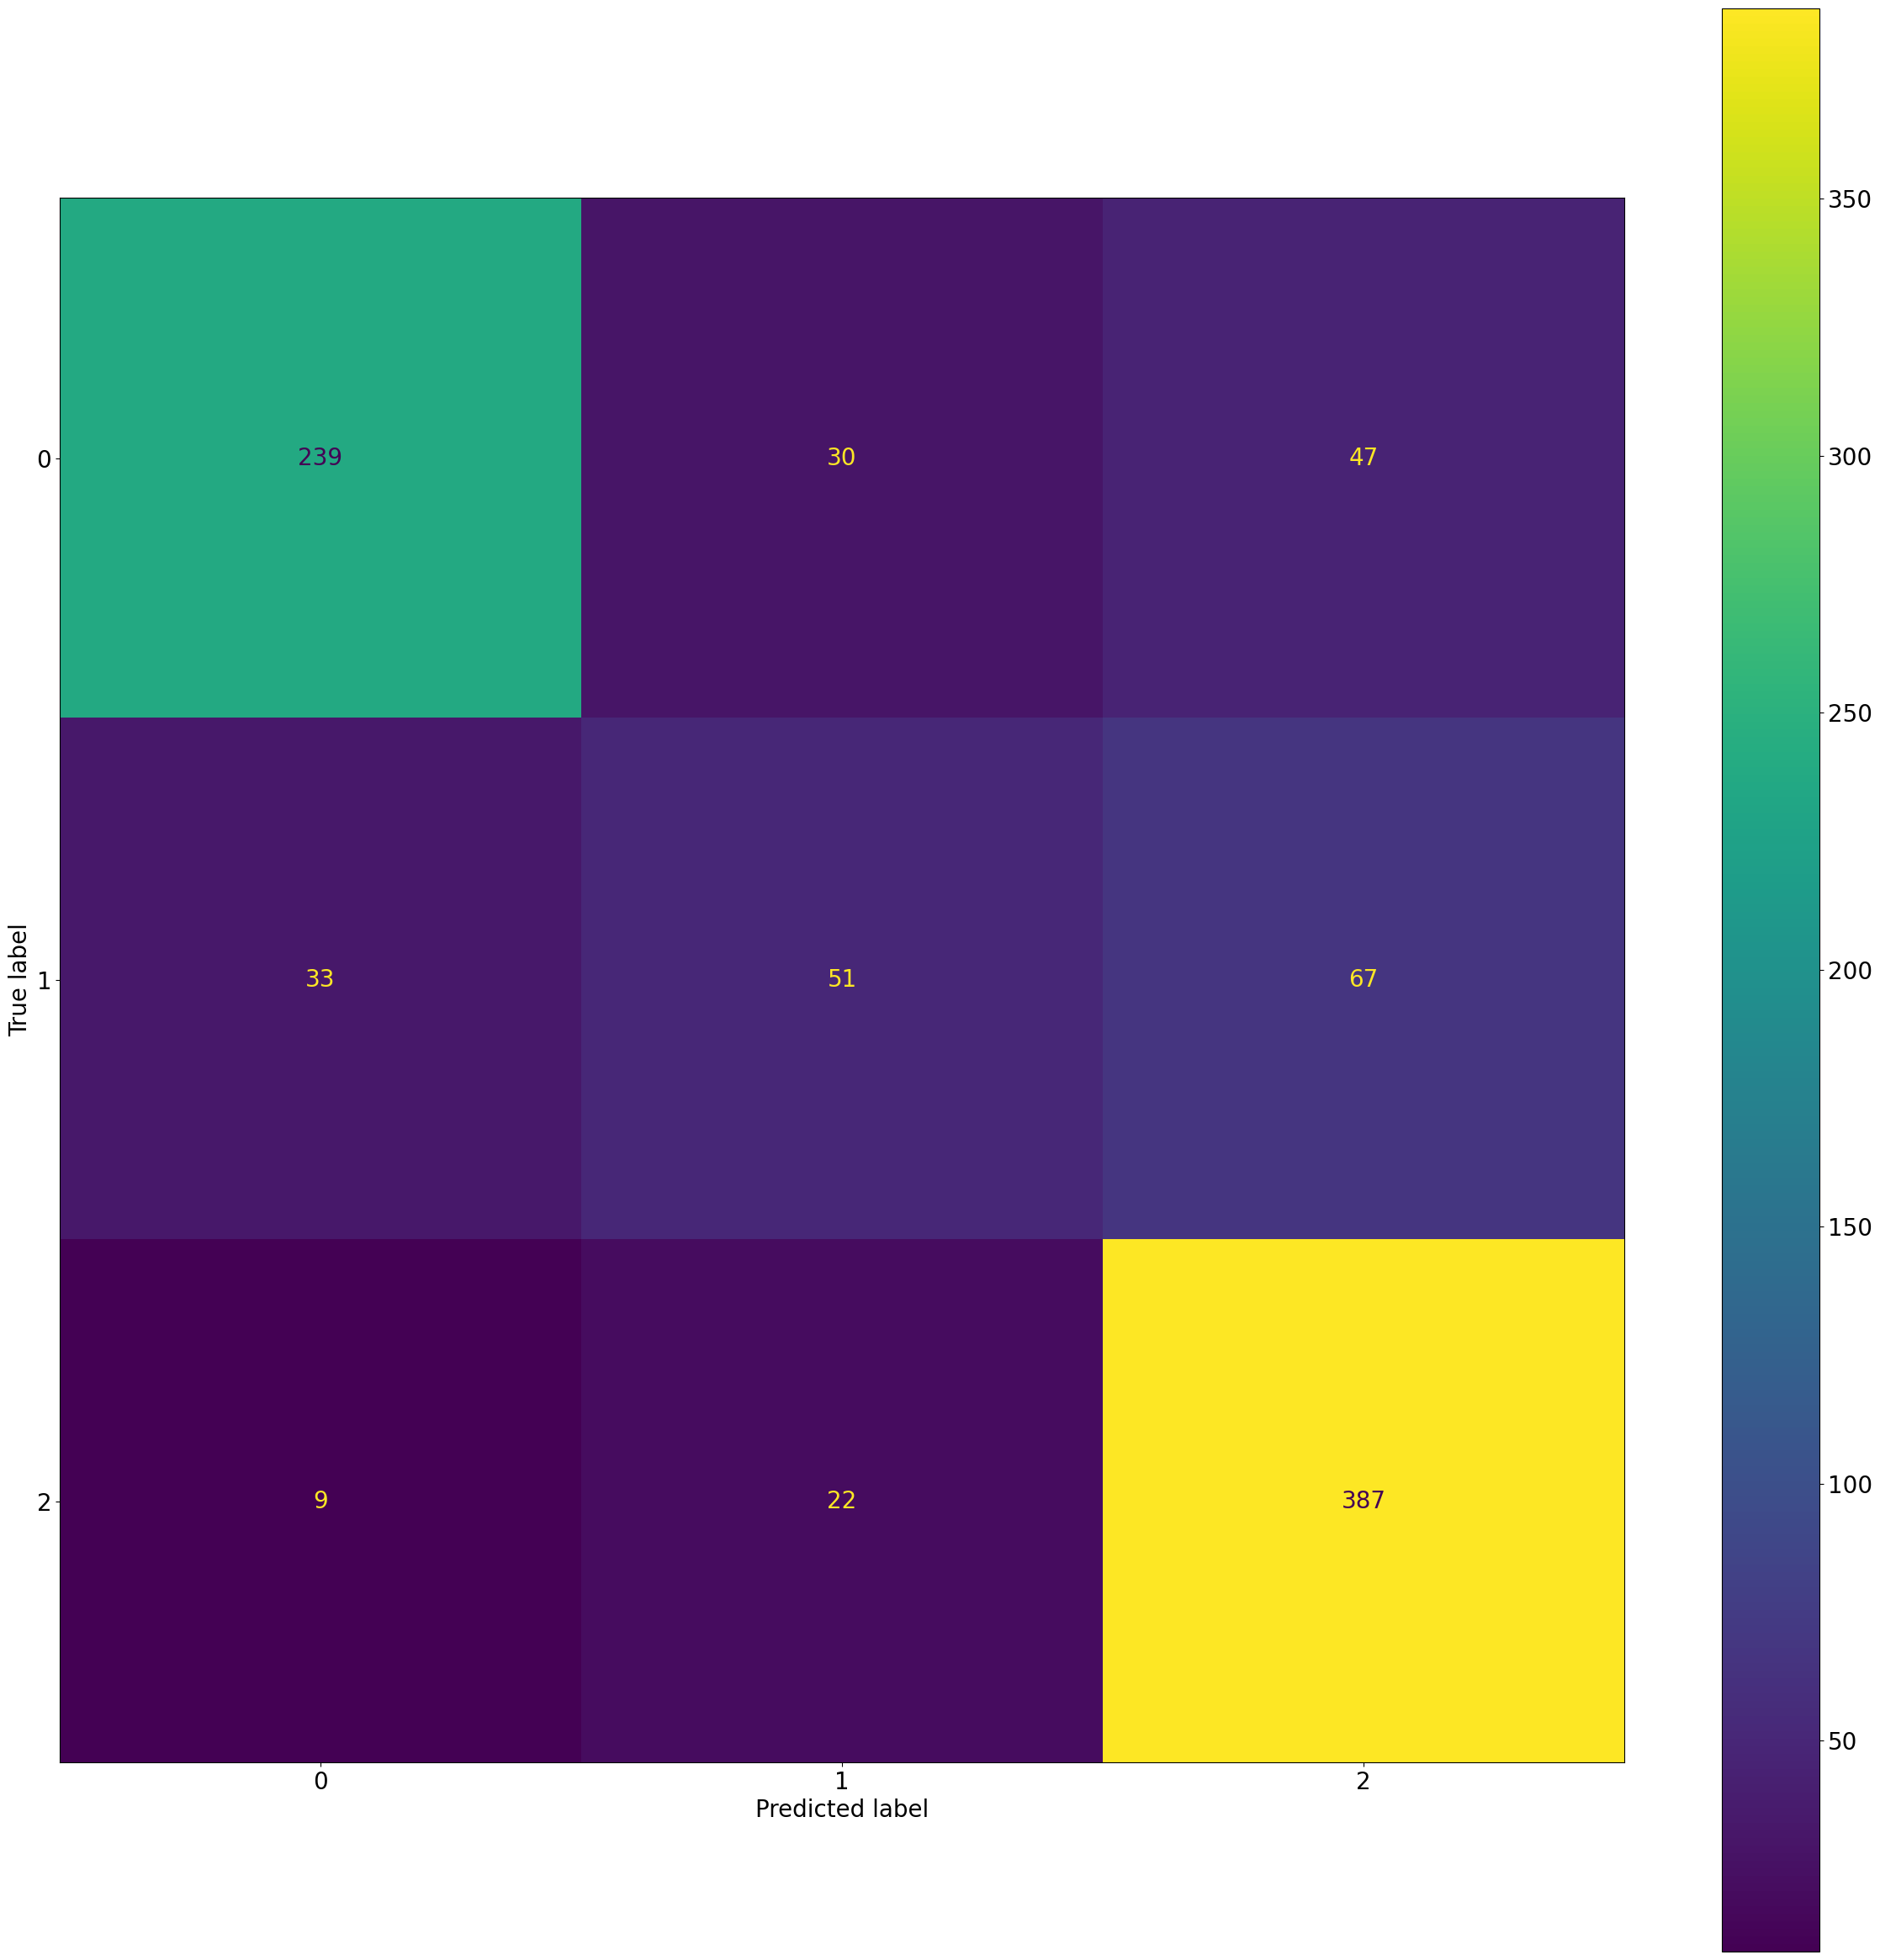

In [51]:
cm = confusion_matrix(y_test_Todas, y_predxgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

### Datos con balanceado Tomek

In [52]:
modelXGB.fit(X_train_balancedTomek_Todas, y_train_balancedTomek_Todas)
y_predT = modelXGB.predict(X_test_scaled_Todas)

print("Accuracy:", accuracy_score(y_test_Todas, y_predT))
print('Precision score: ', precision_score(y_test_Todas, y_predT, average='macro'))
print('Recall score: ', recall_score(y_test_Todas, y_predT, average='macro'))
print('F1 Score: ', f1_score(y_test_Todas, y_predT, average='macro'))

print(classification_report(y_test_Todas, y_predT))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:08:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7627118644067796
Precision score:  0.7109893334600018
Recall score:  0.6997768094399038
F1 Score:  0.7033671935435729
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       316
           1       0.48      0.48      0.48       151
           2       0.80      0.89      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.76      0.76       885



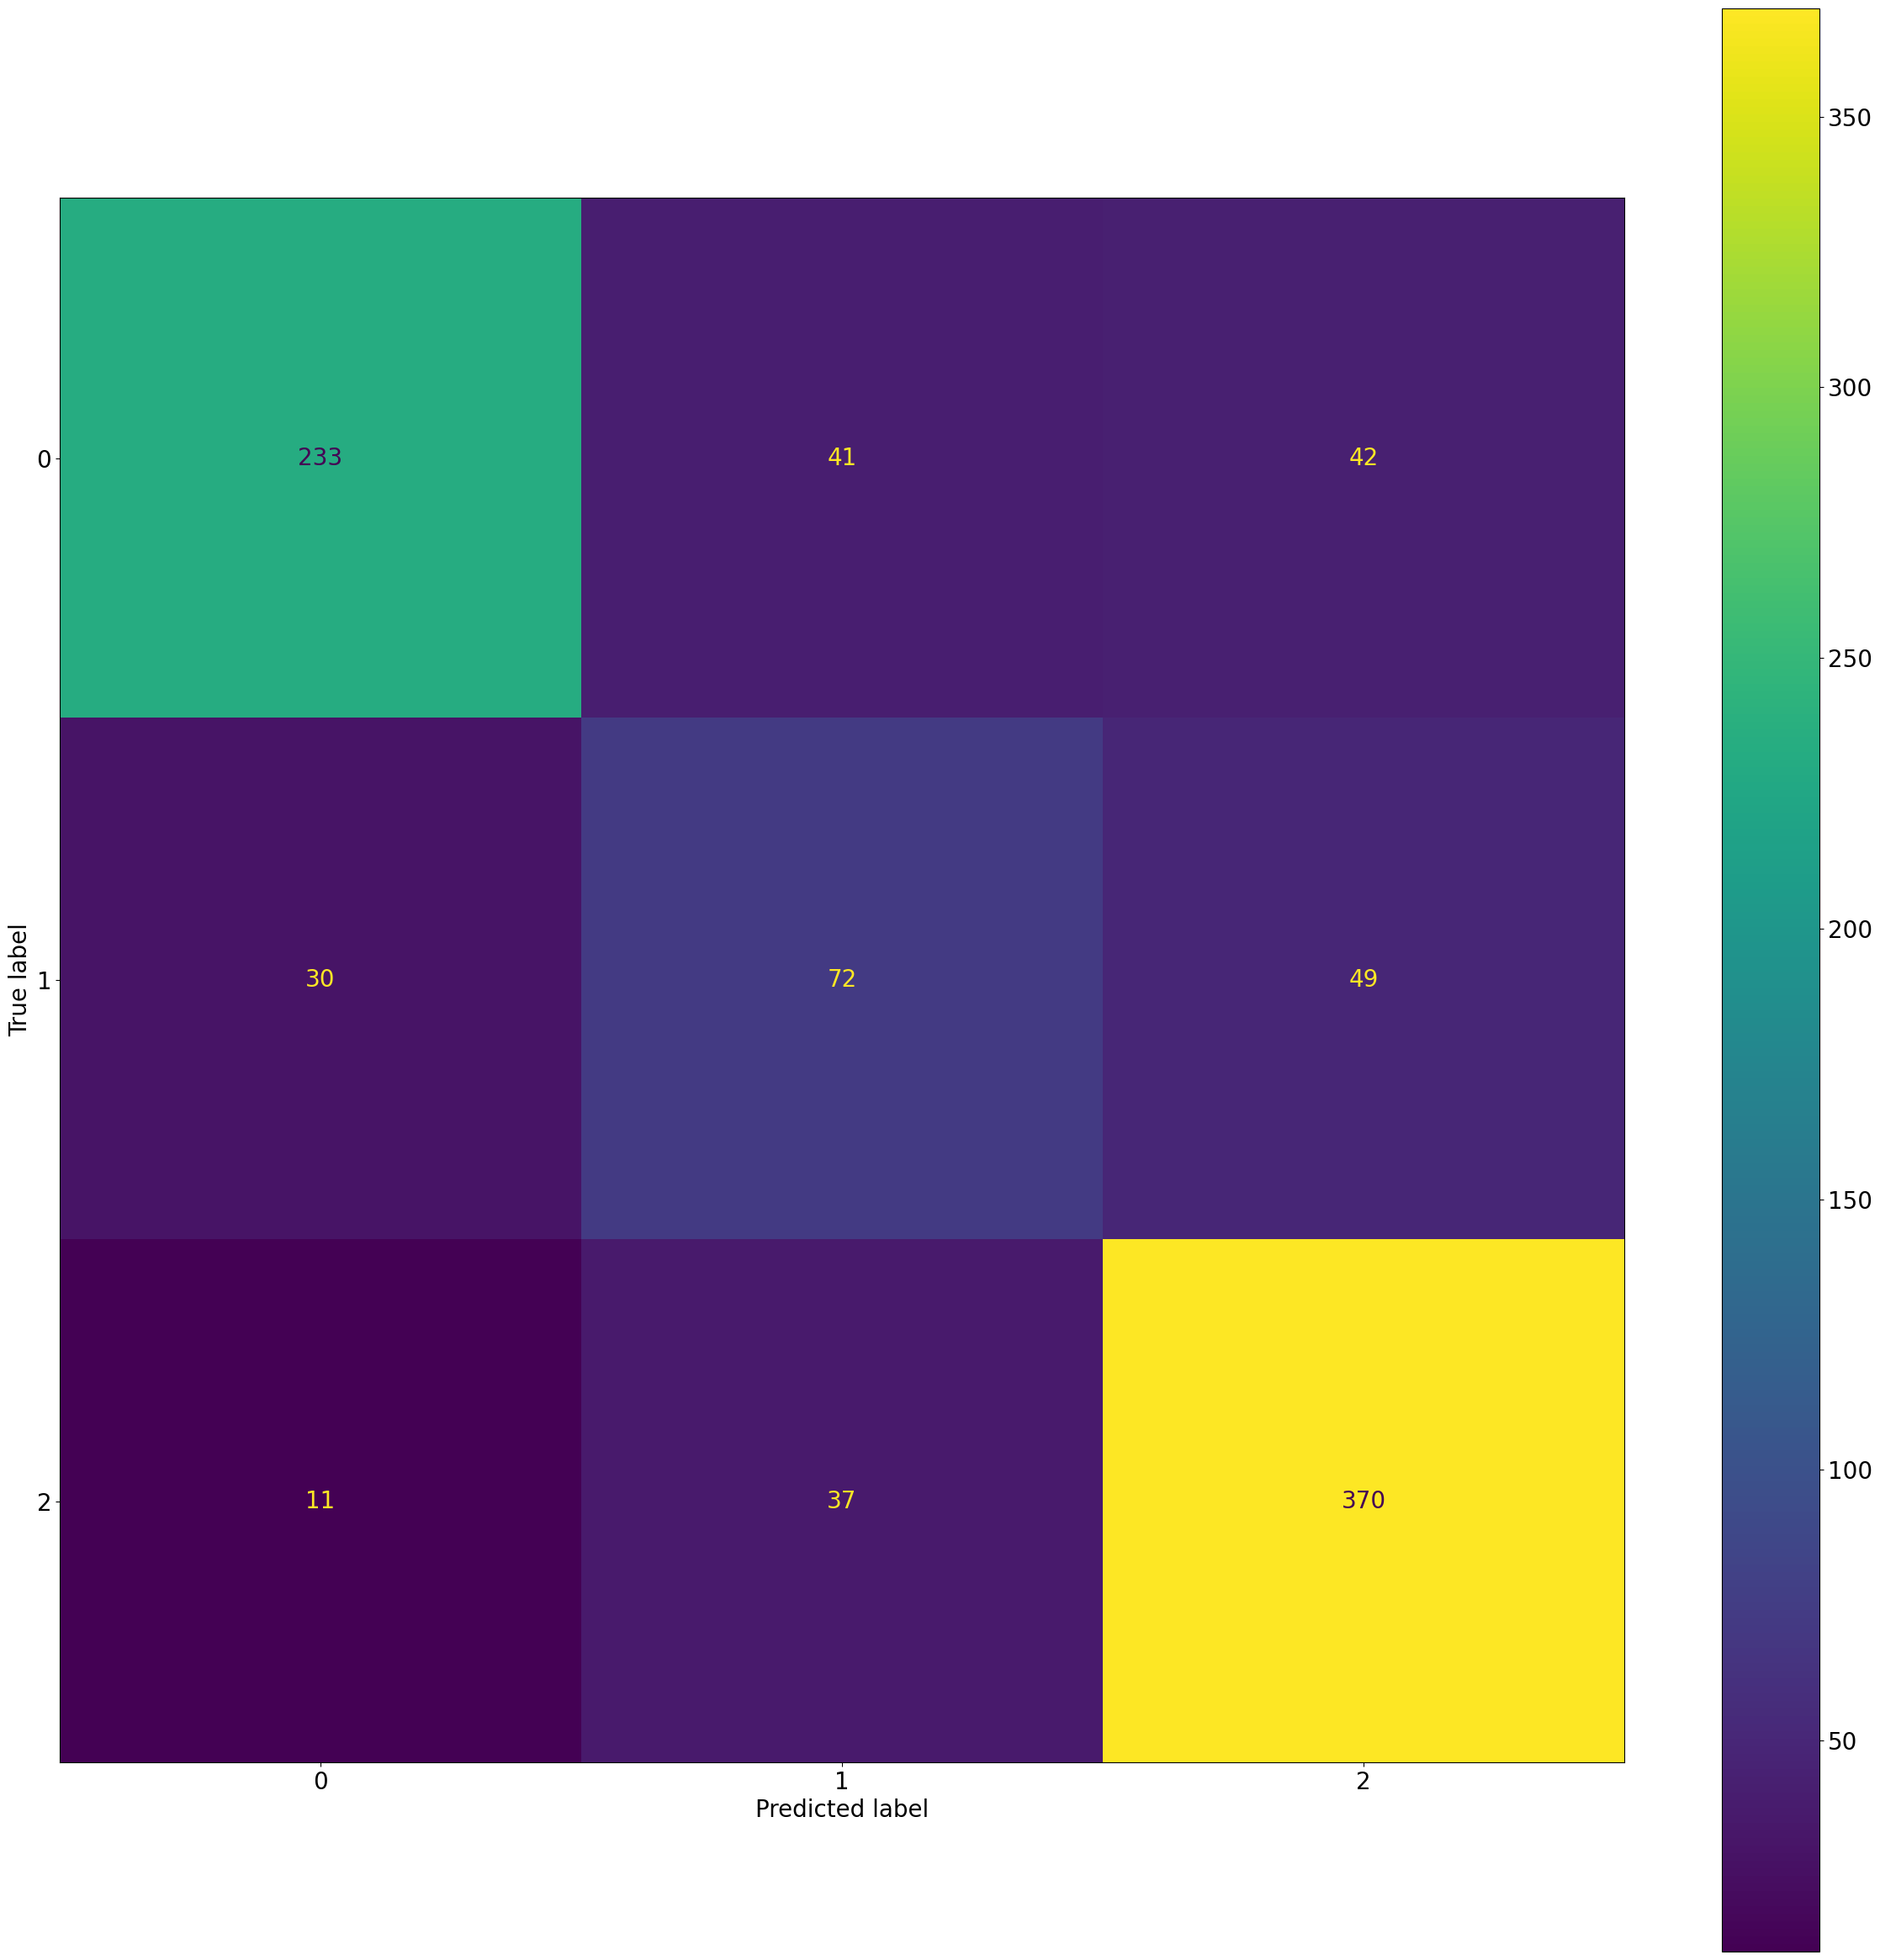

In [53]:
cm = confusion_matrix(y_test_Todas, y_predT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

#Fase 5. Evaluación

##Evaluación del rendimiento del modelo



> Resultados obtenidos con Random Forest y el balanceo de datos con Tomek



In [54]:
print("Accuracy:", accuracy_score(y_test_Todas, y_predRT))
print('Precision score: ', precision_score(y_test_Todas, y_predRT, average='macro'))
print('Recall score: ', recall_score(y_test_Todas, y_predRT, average='macro'))
print('F1 Score: ', f1_score(y_test_Todas, y_predRT, average='macro'))

print(classification_report(y_test_Todas, y_predRT))

Accuracy: 0.768361581920904
Precision score:  0.7169287746675493
Recall score:  0.7047936668884734
F1 Score:  0.7090887371152378
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       316
           1       0.50      0.48      0.49       151
           2       0.80      0.89      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.77      0.77      0.77       885



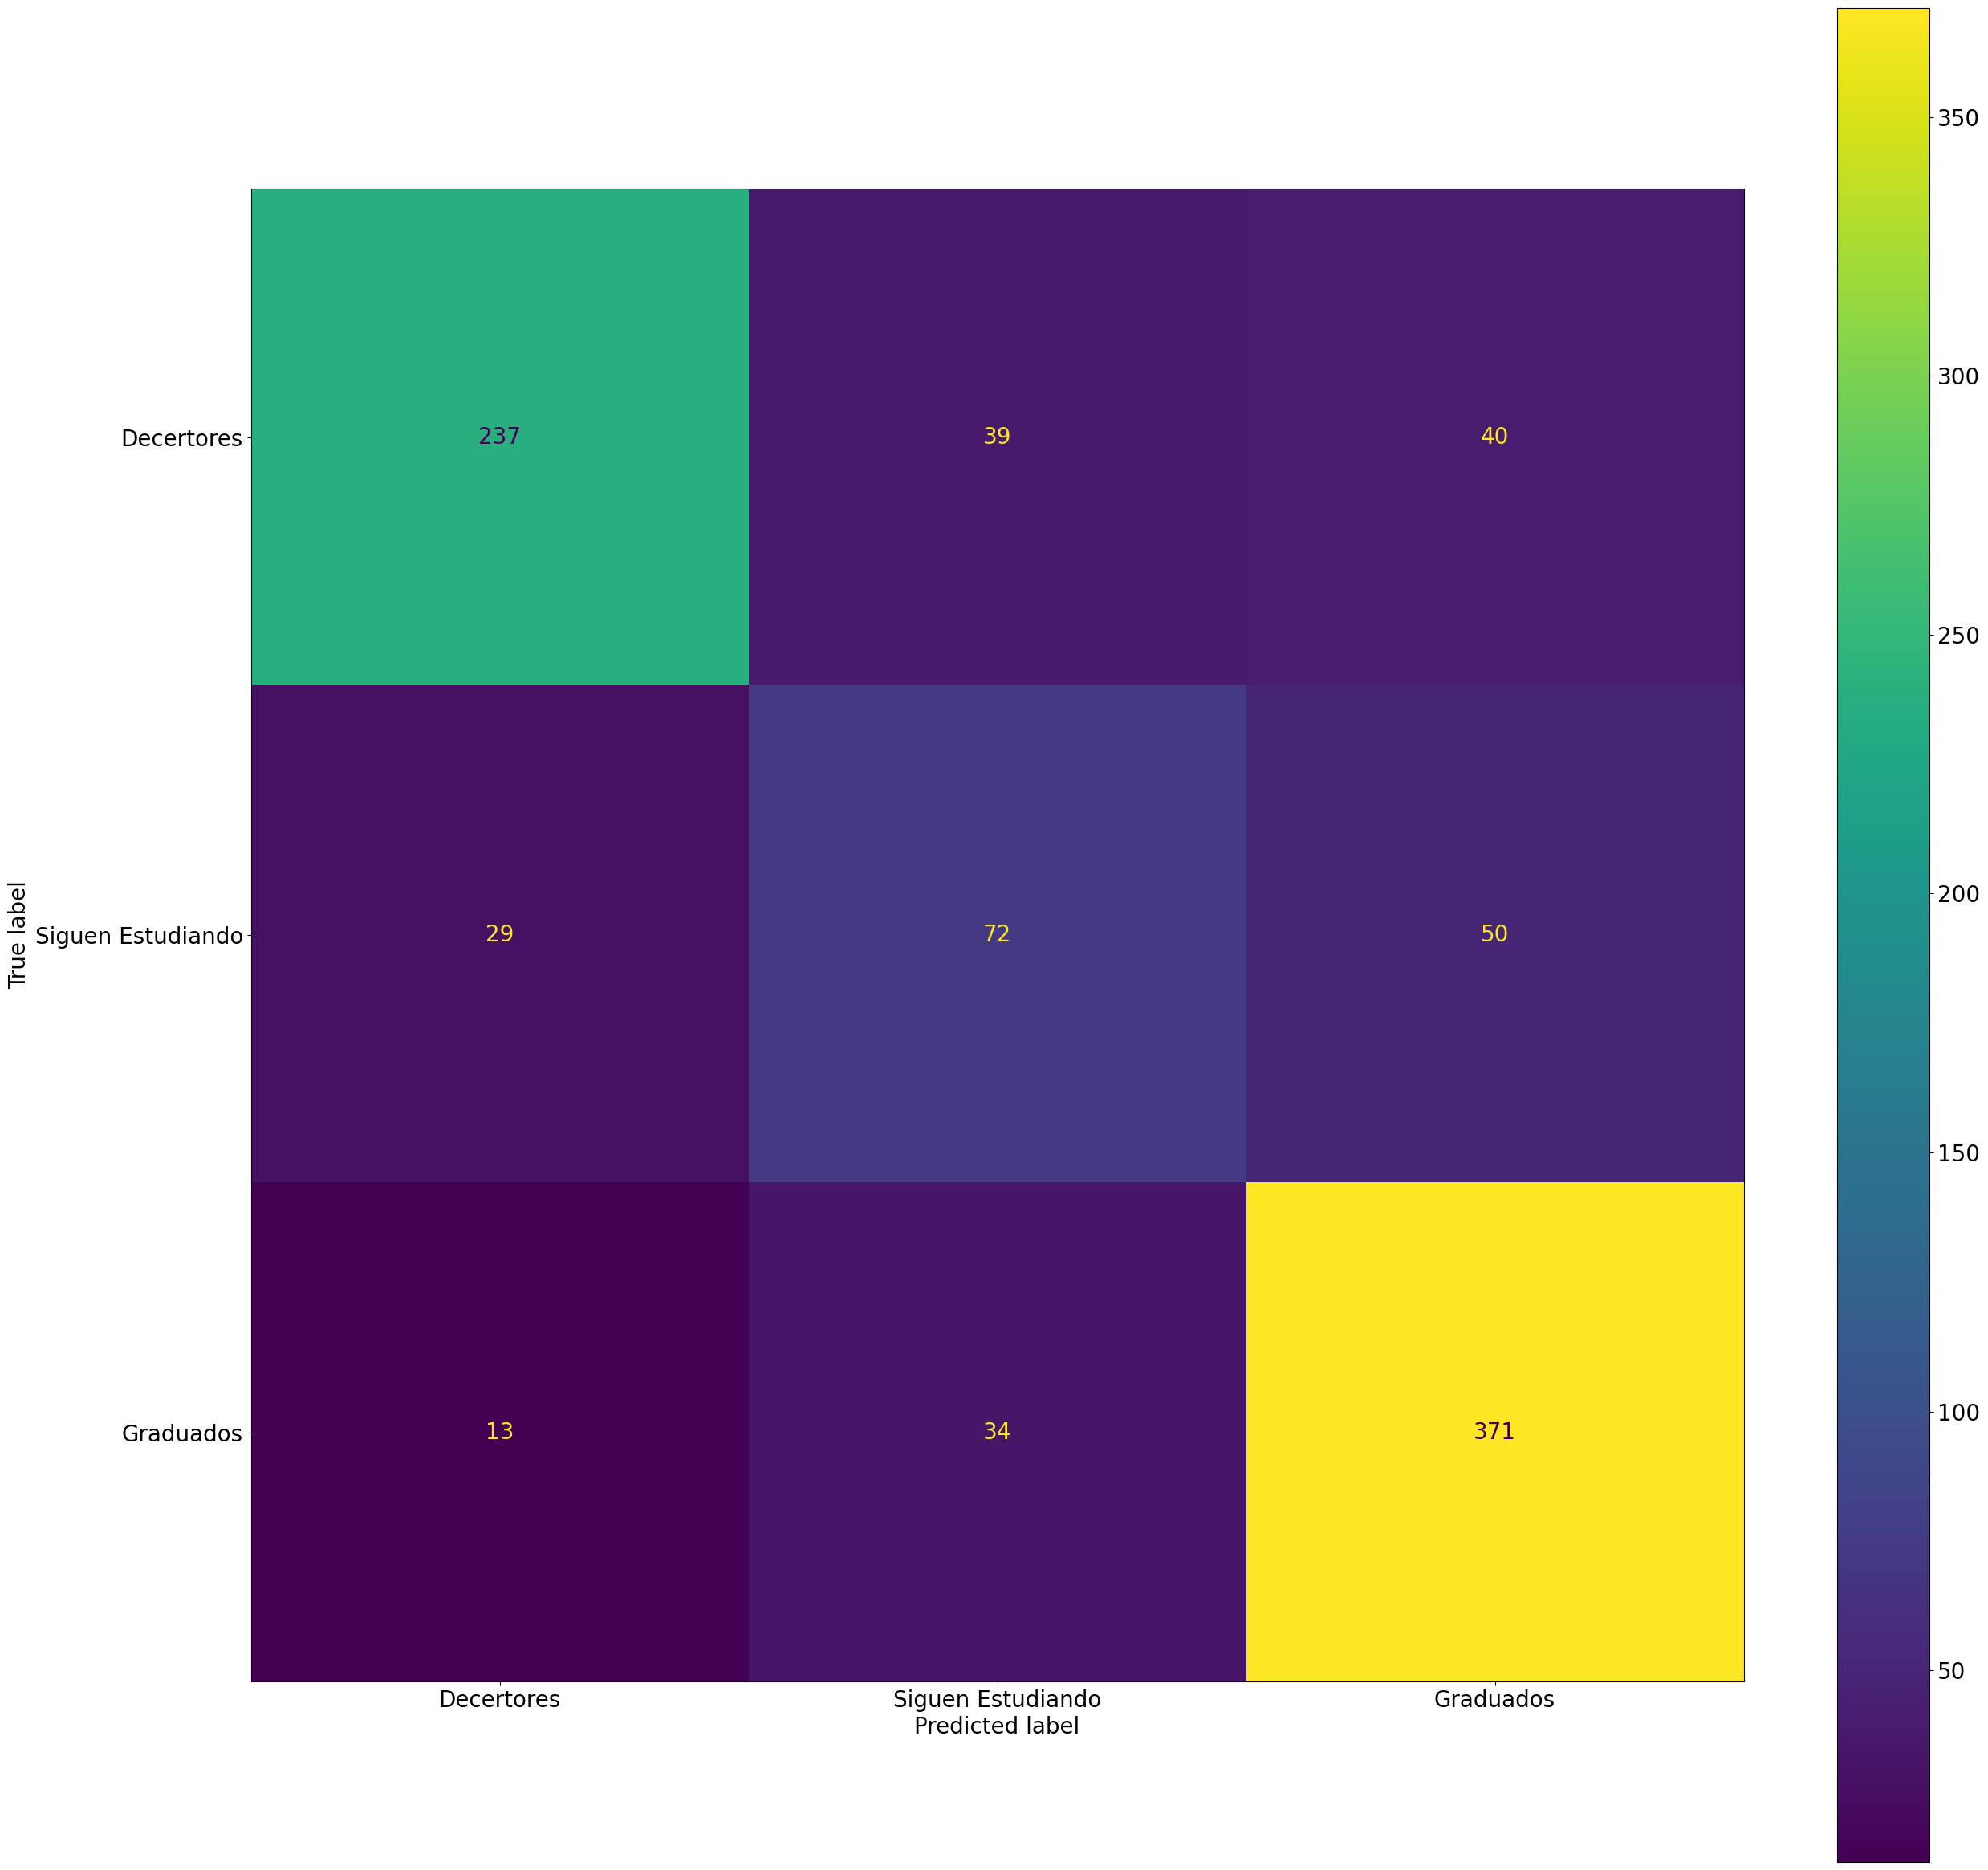

In [55]:
cm = confusion_matrix(y_test_Todas, y_predRT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Decertores', 'Siguen Estudiando', 'Graduados'])
disp.plot()
plt.show()

##Relevancia de las características en el modelo

In [56]:
caractImportantes = modelTomek.feature_importances_
feature_importances = pd.DataFrame({ 'Feature': X_train_balancedTomek_Todas.columns,'Importance': caractImportantes})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.133687
31                Curricular units 2nd sem (grade)    0.098212
24             Curricular units 1st sem (approved)    0.096248
25                Curricular units 1st sem (grade)    0.057642
29          Curricular units 2nd sem (evaluations)    0.056820
16                         Tuition fees up to date    0.043190
23          Curricular units 1st sem (evaluations)    0.041087
19                               Age at enrollment    0.038158
28             Curricular units 2nd sem (enrolled)    0.034180
12                                 Admission grade    0.031926
3                                           Course    0.031047
6                   Previous qualification (grade)    0.029078
11                             Father's occupation    0.027665
22             Curricular units 1st sem (enrolled)    0.026140
10                             Mother's occupation    0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


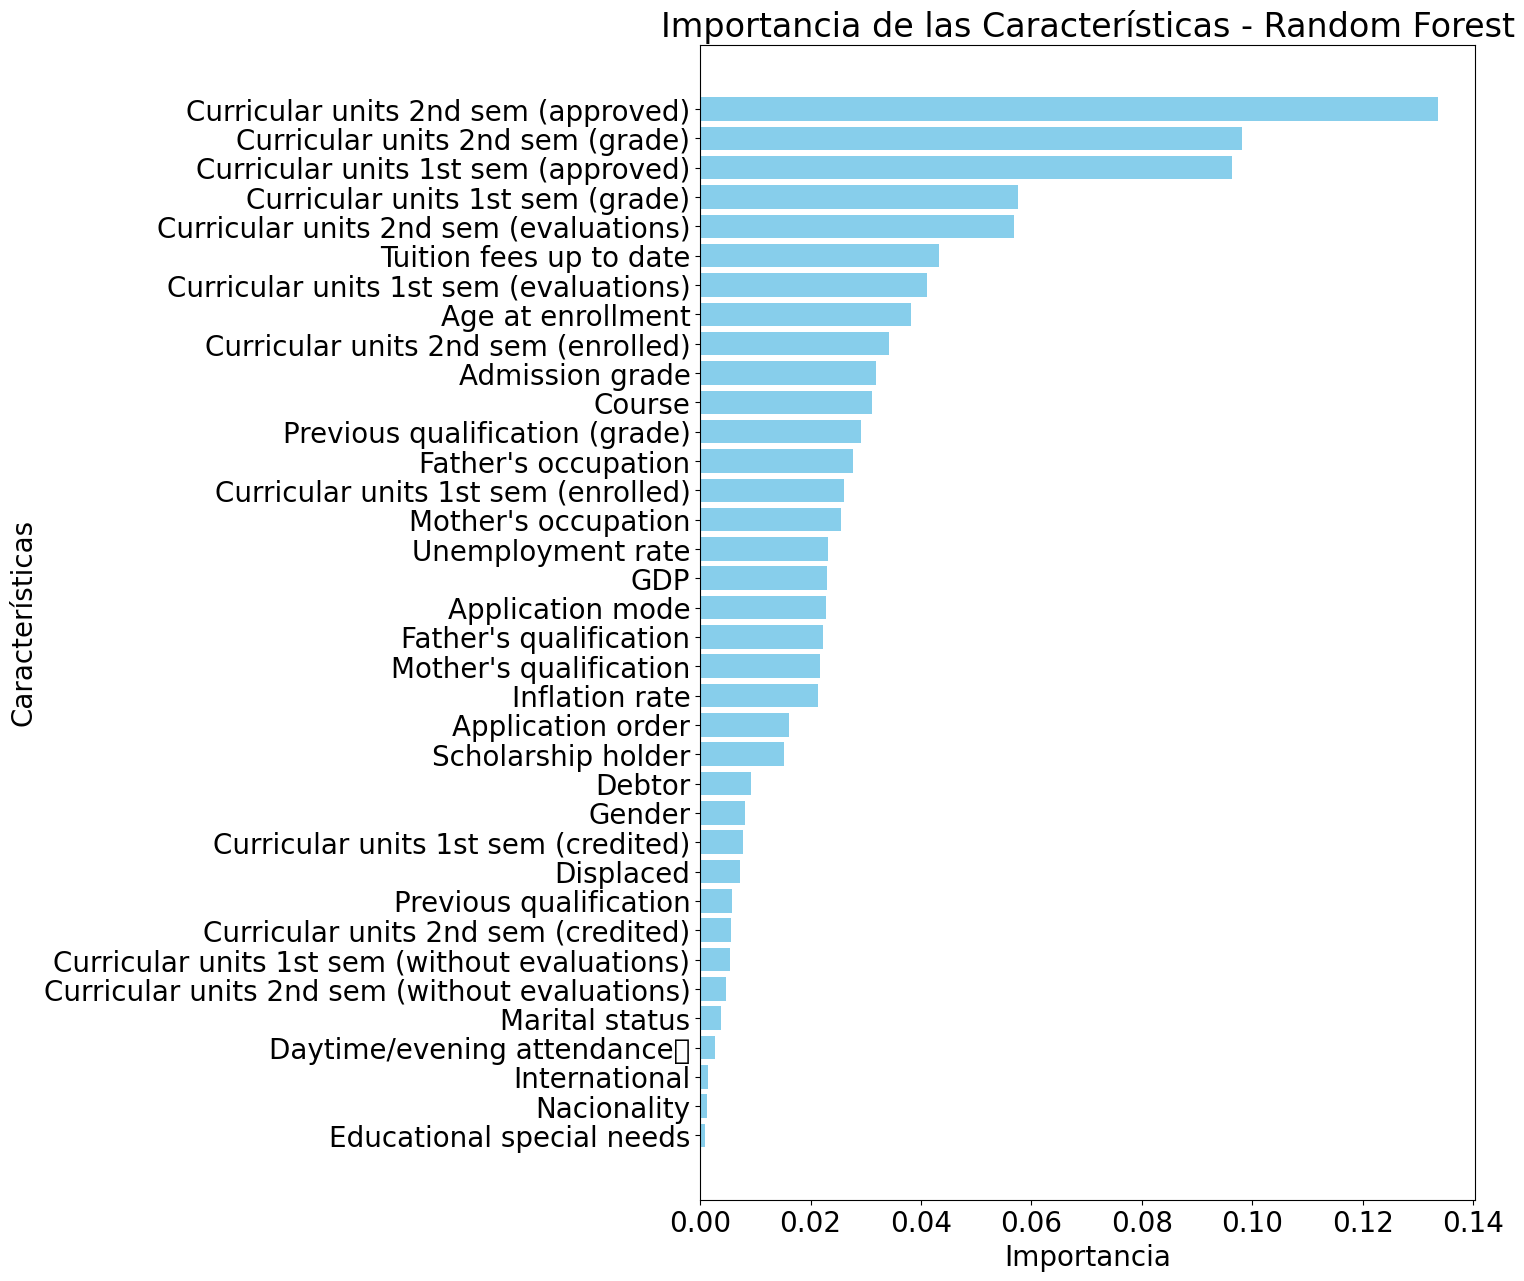

In [57]:
plt.figure(figsize=(10, 15))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características - Random Forest')
plt.gca().invert_yaxis()
plt.show()

#Modelo con las variables significativas

In [58]:
df_datosUCIsignificativo = df_datosUCIpreparado.copy()
columnas_a_eliminar = [
    'Educational special needs', 'Nacionality', 'International',
    'Marital status', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Previous qualification', 'Displaced', 'Curricular units 1st sem (credited)',
    'Debtor', 'Scholarship holder', 'Application order'
]
df_datosUCIsignificativo.drop(columns=columnas_a_eliminar, inplace=True)
df_datosUCIsignificativo.head()

Application mode  Course  Daytime/evening attendance\t  \
0                17     171                             1   
1                15    9254                             1   
2                 1    9070                             1   
3                17    9773                             1   
4                39    8014                             0   

   Previous qualification (grade)  Mother's qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3                           122.0                      38   
4                           100.0                      37   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      12                    5                    9   
1                       3                    3                    3   
2                      37                    9                    9   
3                      37                    5                    3   
4                      38                    9                    9   

   Admission grade  Tuition fees up to date  ...  \
0            127.3                        1  ...   
1            142.5                        0  ...   
2            124.8                        0  ...   
3            119.6                        1  ...   
4            141.5                        1  ...   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Unemployment rate  Inflation rate   GDP  Target  
0               10.8             1.4  1.74       0  
1               13.9            -0.3  0.79       2  
2               10.8             1.4  1.74       0  
3                9.4            -0.8 -3.12       2  
4               13.9            -0.3  0.79       2  

[5 rows x 24 columns]




> Dividir los datos en entrenamiento y prueba









In [59]:
X = df_datosUCIsignificativo.drop(['Target'], axis=1).copy()
y = df_datosUCIsignificativo['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [61]:
X_train_df.to_csv('/content/drive/MyDrive/Prueba/DatosLabel/X_train.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/Prueba/DatosLabel/X_test.csv', index=False)
y_train_df.to_csv('/content/drive/MyDrive/Prueba/DatosLabel/y_train.csv', index=False)
y_test_df.to_csv('/content/drive/MyDrive/Prueba/DatosLabel/y_test.csv', index=False)

In [62]:
X_train = pd.read_csv('/content/drive/MyDrive/Prueba/DatosLabel/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Prueba/DatosLabel/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Prueba/DatosLabel/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Prueba/DatosLabel/y_test.csv')



> Normalizar los datos



In [63]:
X_train_scaled, X_test_scaled, scaler = scale_data(X_train, X_test)

In [64]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [65]:
X_train_scaled_df.to_csv('/content/drive/MyDrive/Prueba/DatosNormalizados/X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('/content/drive/MyDrive/Prueba/DatosNormalizados/X_test_scaled.csv', index=False)

In [66]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Prueba/DatosNormalizados/X_train_scaled.csv')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Prueba/DatosNormalizados/X_test_scaled.csv')



> Balanceo de datos con Tomek Links



In [67]:
smote_tomek = SMOTETomek(random_state=42)
X_train_balancedTomek, y_train_balancedTomek = smote_tomek.fit_resample(X_train_scaled, y_train)

In [68]:
print("Distribución de las clases antes del balanceo:", y_train.value_counts())
print("Distribución de las clases después del balanceo:", y_train_balancedTomek.value_counts())

Distribución de las clases antes del balanceo: Target
2         1791
0         1105
1          643
Name: count, dtype: int64
Distribución de las clases después del balanceo: Target
1         1751
0         1734
2         1708
Name: count, dtype: int64


In [69]:
X_train_balancedTomek.describe()

Application mode       Course  Daytime/evening attendance\t  \
count       5193.000000  5193.000000                   5193.000000   
mean           0.330212     0.886481                      0.883740   
std            0.306488     0.204541                      0.320103   
min            0.000000     0.000000                      0.000000   
25%            0.000000     0.909394                      1.000000   
50%            0.285714     0.924382                      1.000000   
75%            0.678571     0.954798                      1.000000   
max            1.000000     1.000000                      1.000000   

       Previous qualification (grade)  Mother's qualification  \
count                     5193.000000             5193.000000   
mean                         0.388877                0.428592   
std                          0.130180                0.367235   
min                          0.000000                0.000000   
25%                          0.307210                0.024350   
50%                          0.389474                0.428571   
75%                          0.463699                0.857143   
max                          1.000000                1.000000   

       Father's qualification  Mother's occupation  Father's occupation  \
count             5193.000000          5193.000000          5193.000000   
mean                 0.491977             0.058534             0.059409   
std                  0.353474             0.141543             0.138938   
min                  0.000000             0.000000             0.000000   
25%                  0.046512             0.020619             0.020513   
50%                  0.418605             0.028766             0.035897   
75%                  0.837209             0.046392             0.046154   
max                  1.000000             1.000000             1.000000   

       Admission grade  Tuition fees up to date  ...  \
count      5193.000000              5193.000000  ...   
mean          0.326753                 0.868194  ...   
std           0.143161                 0.338067  ...   
min           0.000000                 0.000000  ...   
25%           0.236842                 1.000000  ...   
50%           0.316842                 1.000000  ...   
75%           0.402105                 1.000000  ...   
max           1.000000                 1.000000  ...   

       Curricular units 1st sem (evaluations)  \
count                             5193.000000   
mean                                 0.187450   
std                                  0.090253   
min                                  0.000000   
25%                                  0.147276   
50%                                  0.177778   
75%                                  0.226924   
max                                  1.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          5193.000000                       5193.000000   
mean                              0.166176                          0.546702   
std                               0.111458                          0.257264   
min                               0.000000                          0.000000   
25%                               0.096724                          0.573312   
50%                               0.192308                          0.635762   
75%                               0.230769                          0.693068   
max                               1.000000                          1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          5193.000000   
mean                              0.263435   
std                               0.087765   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.283994   
max                               1.000000   

       Curricular units 2nd sem

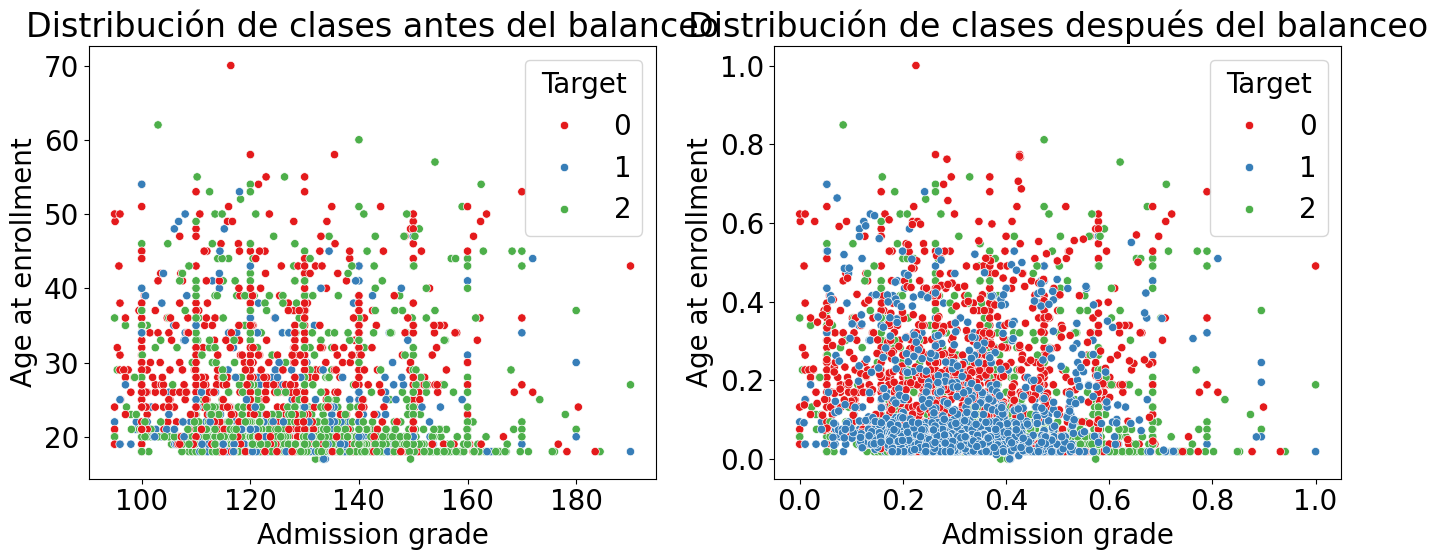

In [70]:
y_train_balancedTomek = pd.Series(y_train_balancedTomek.squeeze())

feature_x = 'Admission grade'
feature_y = 'Age at enrollment'

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_train, x=feature_x, y=feature_y, hue=y_train['Target'], palette='Set1')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

X_train_balanced_df = pd.DataFrame(X_train_balancedTomek, columns=X_train.columns)
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_train_balanced_df, x=feature_x, y=feature_y, hue=y_train_balancedTomek, palette='Set1')
plt.title('Distribución de clases después del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()



> Balanceo de datos con Random Under Sampler



In [71]:
undersampler = RandomUnderSampler(random_state=42)
X_train_balance_Random, y_train_balance_Random = undersampler.fit_resample(X_train_scaled, y_train)

In [72]:
print("Distribución de las clases antes del undersampling:", y_train.value_counts())
print("Distribución de clases después del undersampling:", y_train_balance_Random.value_counts())

Distribución de las clases antes del undersampling: Target
2         1791
0         1105
1          643
Name: count, dtype: int64
Distribución de clases después del undersampling: Target
0         643
1         643
2         643
Name: count, dtype: int64




> Guardar los datos en csv en el drive



In [73]:
X_train_balancedTomek_df = pd.DataFrame(X_train_balancedTomek)
y_train_balancedTomek_df = pd.DataFrame(y_train_balancedTomek)

In [74]:
X_train_balancedTomek_df.to_csv('/content/drive/MyDrive/Prueba/DatosLabelTomek/X_train_balancedTomek.csv', index=False)
y_train_balancedTomek_df.to_csv('/content/drive/MyDrive/Prueba/DatosLabelTomek/y_train_balancedTomek.csv', index=False)

In [75]:
X_train_balancedTomek = pd.read_csv('/content/drive/MyDrive/Prueba/DatosLabelTomek/X_train_balancedTomek.csv')
y_train_balancedTomek = pd.read_csv('/content/drive/MyDrive/Prueba/DatosLabelTomek/y_train_balancedTomek.csv')



> Guardar los datos en csv en el drive



In [76]:
X_train_balance_Random.describe()

Application mode       Course  Daytime/evening attendance\t  \
count       1929.000000  1929.000000                   1929.000000   
mean           0.328057     0.880858                      0.884914   
std            0.310910     0.215404                      0.319208   
min            0.000000     0.000000                      0.000000   
25%            0.000000     0.909018                      1.000000   
50%            0.285714     0.924382                      1.000000   
75%            0.678571     0.956317                      1.000000   
max            0.928571     1.000000                      1.000000   

       Previous qualification (grade)  Mother's qualification  \
count                     1929.000000             1929.000000   
mean                         0.391871                0.426140   
std                          0.137762                0.367509   
min                          0.000000                0.000000   
25%                          0.305263                0.023810   
50%                          0.400000                0.428571   
75%                          0.473684                0.857143   
max                          1.000000                1.000000   

       Father's qualification  Mother's occupation  Father's occupation  \
count             1929.000000          1929.000000          1929.000000   
mean                 0.492760             0.061452             0.061320   
std                  0.355812             0.149543             0.141918   
min                  0.000000             0.000000             0.000000   
25%                  0.046512             0.020619             0.020513   
50%                  0.418605             0.025773             0.035897   
75%                  0.837209             0.046392             0.046154   
max                  0.976744             1.000000             1.000000   

       Admission grade  Tuition fees up to date  ...  \
count      1929.000000              1929.000000  ...   
mean          0.327221                 0.868844  ...   
std           0.148395                 0.337658  ...   
min           0.000000                 0.000000  ...   
25%           0.234737                 1.000000  ...   
50%           0.320000                 1.000000  ...   
75%           0.408421                 1.000000  ...   
max           1.000000                 1.000000  ...   

       Curricular units 1st sem (evaluations)  \
count                             1929.000000   
mean                                 0.185082   
std                                  0.092420   
min                                  0.000000   
25%                                  0.133333   
50%                                  0.177778   
75%                                  0.222222   
max                                  1.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          1929.000000                       1929.000000   
mean                              0.163895                          0.541848   
std                               0.113522                          0.264854   
min                               0.000000                          0.000000   
25%                               0.076923                          0.565121   
50%                               0.192308                          0.635762   
75%                               0.230769                          0.697572   
max                               0.807692                          0.918322   

       Curricular units 2nd sem (enrolled)  \
count                          1929.000000   
mean                              0.261163   
std                               0.092734   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.260870   
max                               1.000000   

       Curricular units 2nd sem

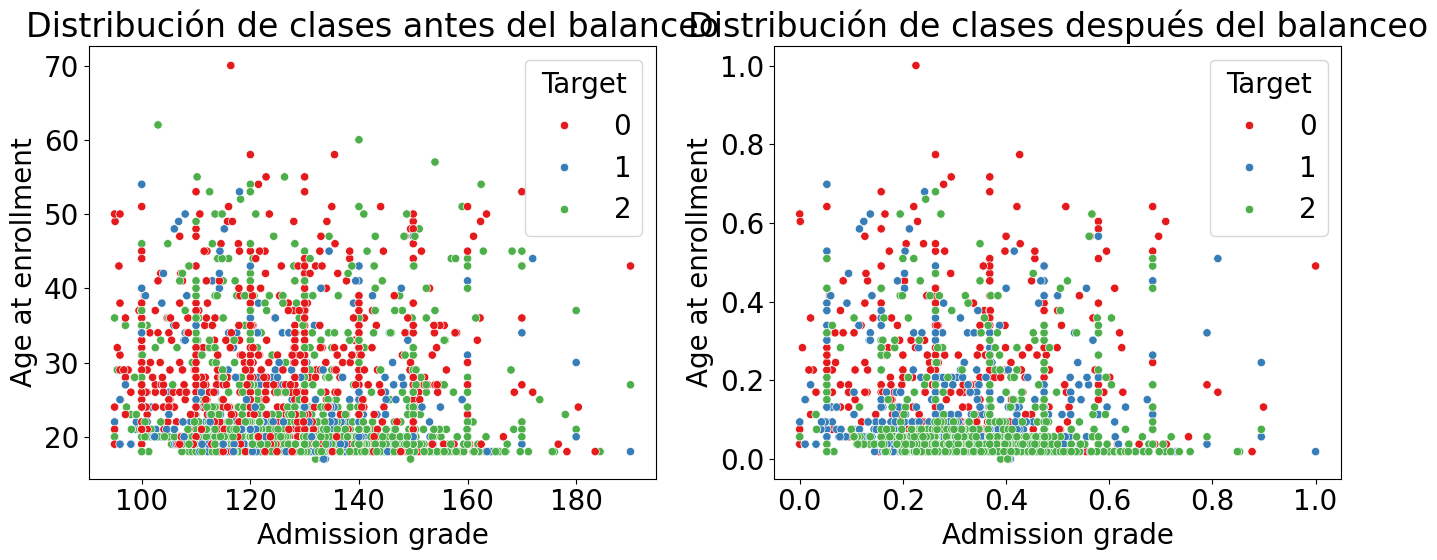

In [77]:
y_train_balance_Random = pd.Series(y_train_balance_Random.squeeze())

feature_x = 'Admission grade'
feature_y = 'Age at enrollment'

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_train, x=feature_x, y=feature_y, hue=y_train['Target'], palette='Set1')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.subplot(1, 2, 2)
X_train_balanced_df = pd.DataFrame(X_train_balance_Random, columns=X_train.columns)
sns.scatterplot(data=X_train_balanced_df, x=feature_x, y=feature_y, hue=y_train_balance_Random, palette='Set1')
plt.title('Distribución de clases después del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()

Modelado



## Entrenamiento con Random Forest



### Datos desbalanceados

In [78]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy score: 0.7593220338983051
Precision score:  0.703643239735638
Recall score:  0.667135415643033
F1 Score:  0.6756009567917044
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       316
           1       0.52      0.33      0.40       151
           2       0.77      0.92      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



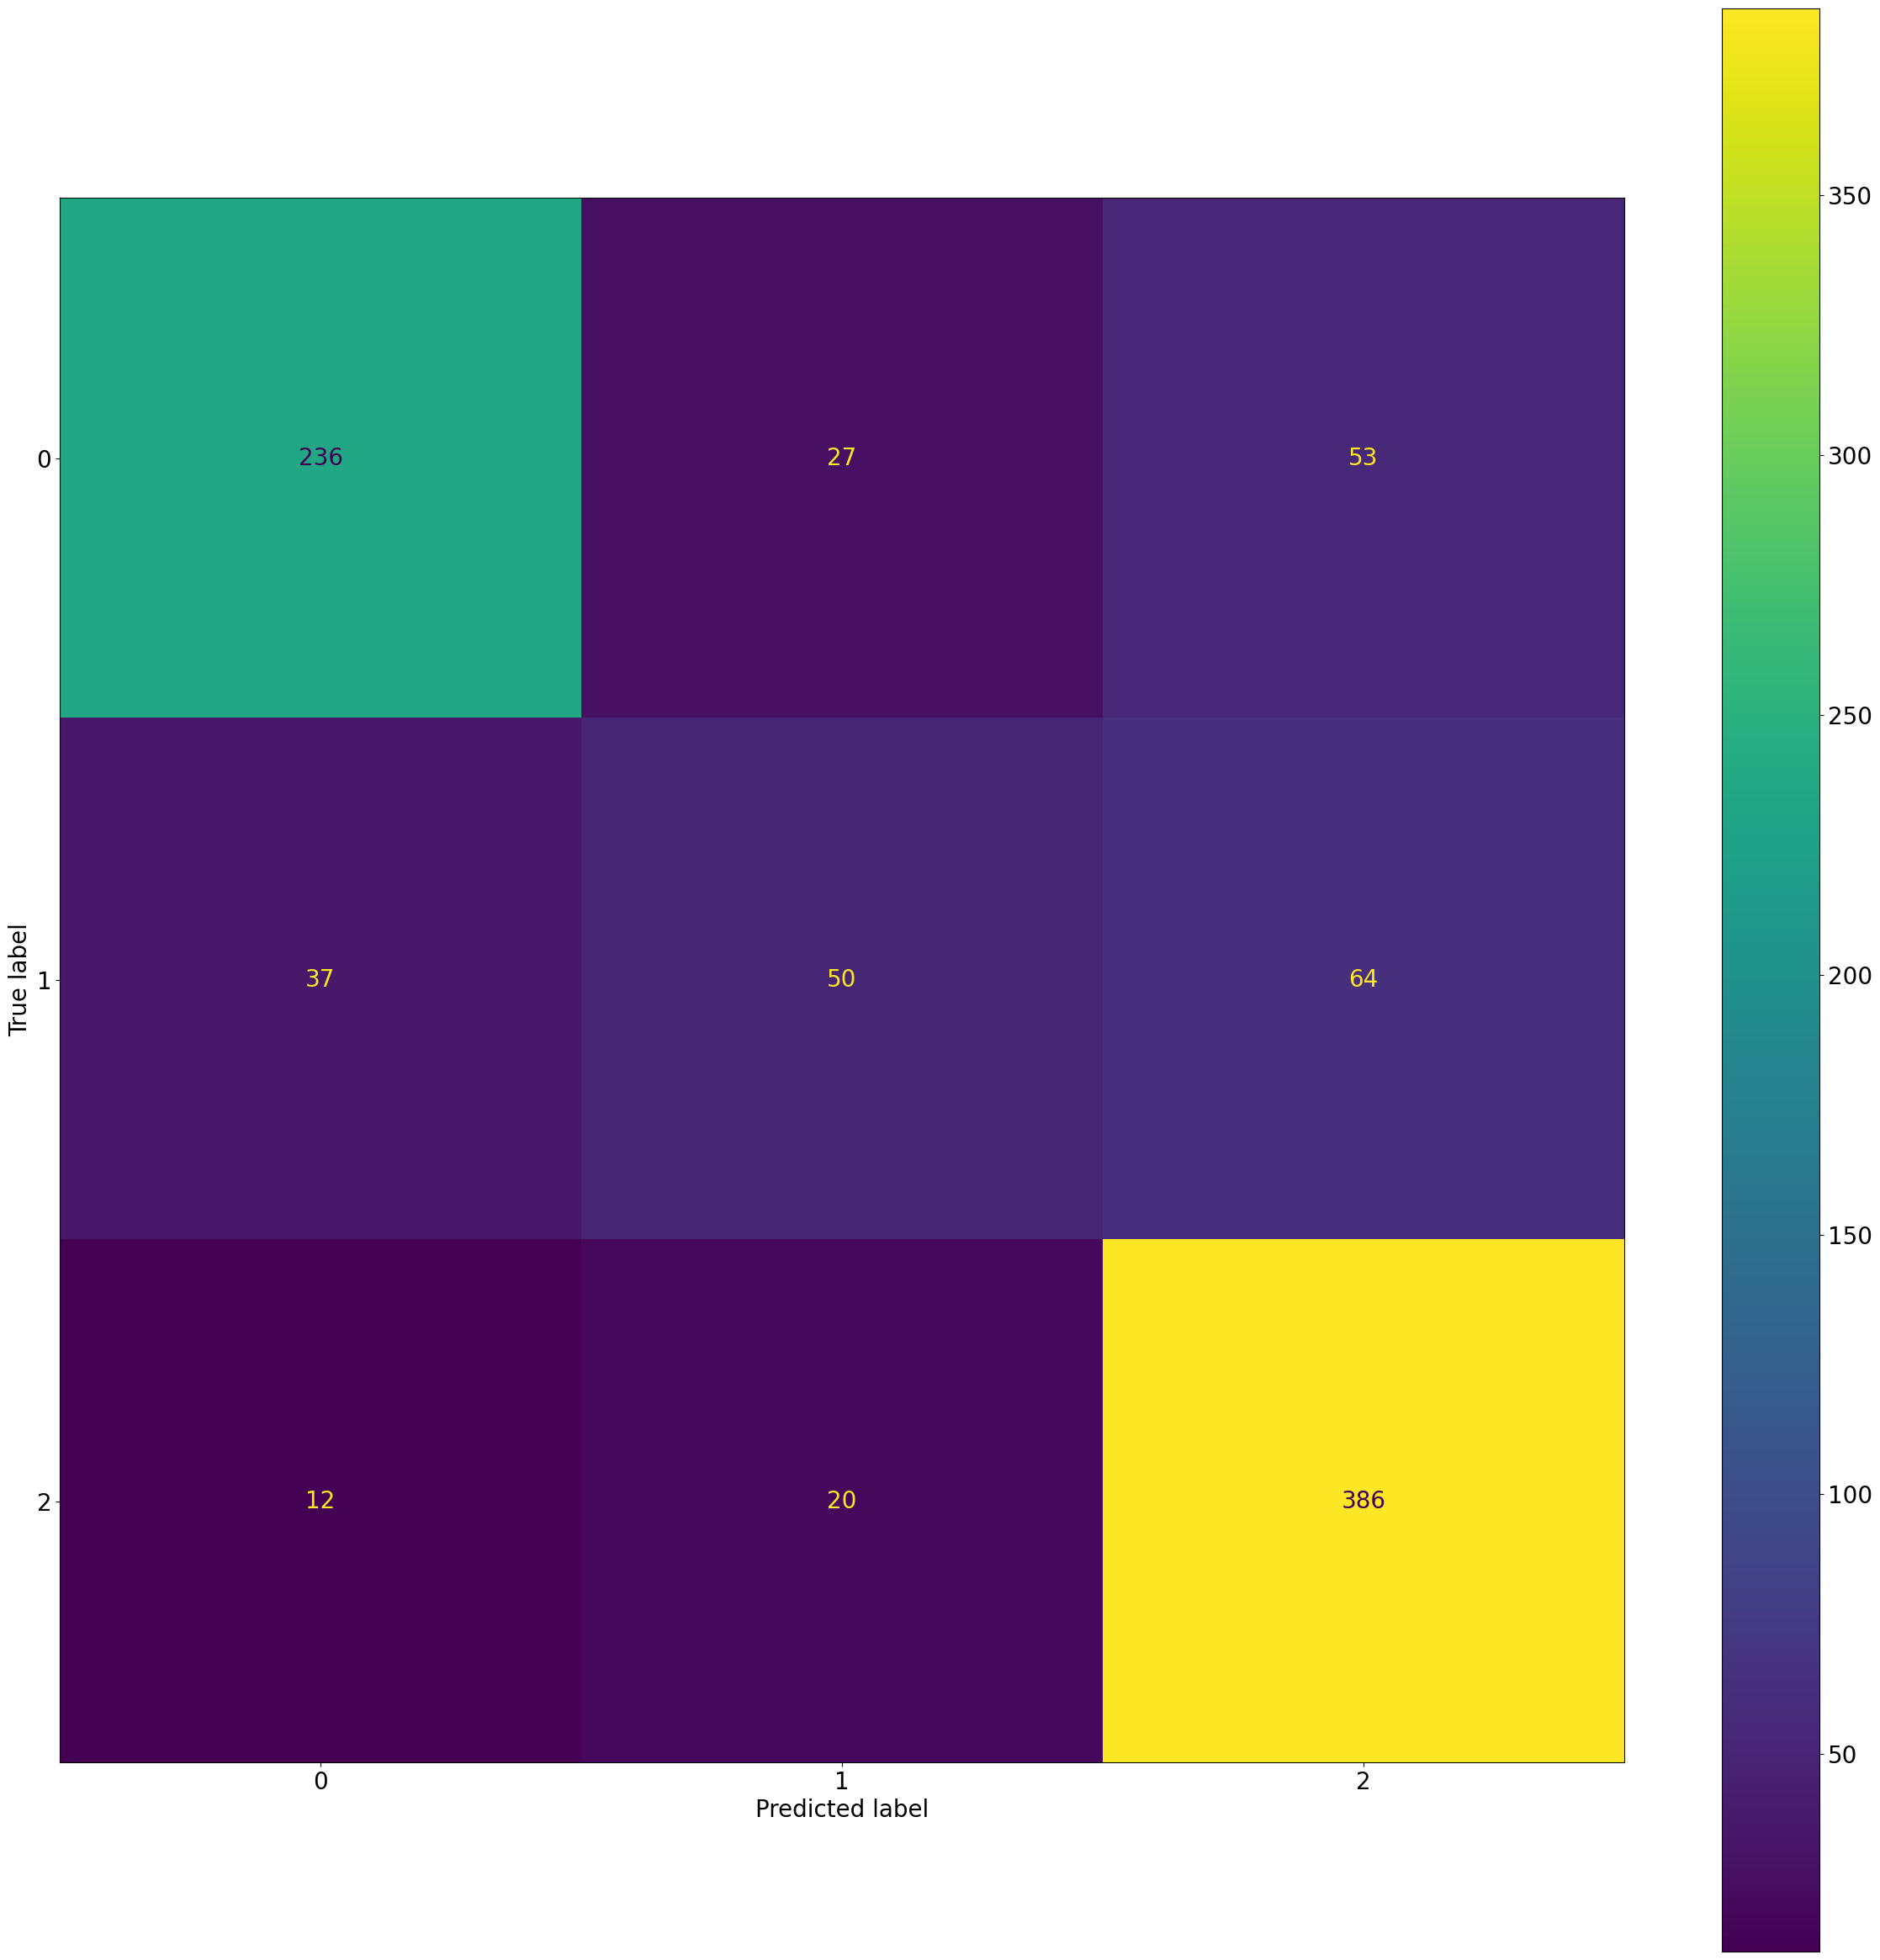

In [79]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Datos con balanceado Tomek

In [80]:
modelTomek = RandomForestClassifier(random_state=42)
modelTomek.fit(X_train_balancedTomek, y_train_balancedTomek)
y_predRT = modelTomek.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predRT))
print('Precision score: ', precision_score(y_test, y_predRT, average='macro'))
print('Recall score: ', recall_score(y_test, y_predRT, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predRT, average='macro'))

print(classification_report(y_test, y_predRT))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7581920903954802
Precision score:  0.7030733554397073
Recall score:  0.6912041915196546
F1 Score:  0.6952520804825472
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       316
           1       0.47      0.45      0.46       151
           2       0.80      0.88      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.69      0.70       885
weighted avg       0.76      0.76      0.76       885



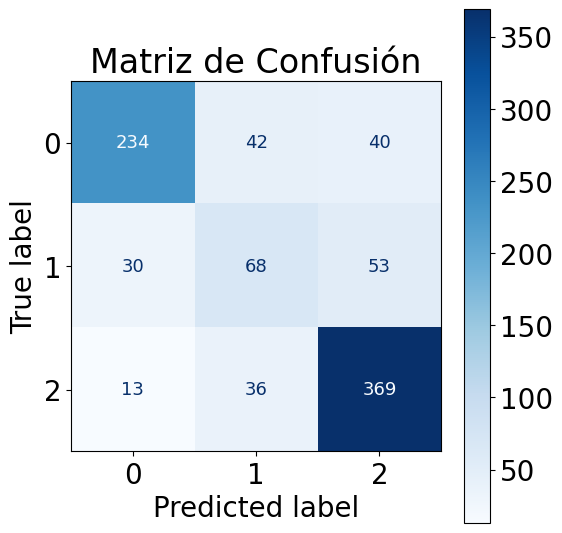

In [130]:
cm = confusion_matrix(y_test, y_predRT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelTomek.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
for text in disp.text_.ravel():
    text.set_fontsize(13)
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

## Entrenamiento con XGBoost

### Datos desbalanceados

In [82]:
import xgboost as xgb
modelXGB = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [83]:
modelXGB.fit(X_train_scaled, y_train)
y_pred = modelXGB.predict(X_test_scaled)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy score: 0.7672316384180791
Precision score:  0.7150627264405163
Recall score:  0.6788725905253078
F1 Score:  0.6883863054468643
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       316
           1       0.52      0.36      0.43       151
           2       0.77      0.93      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



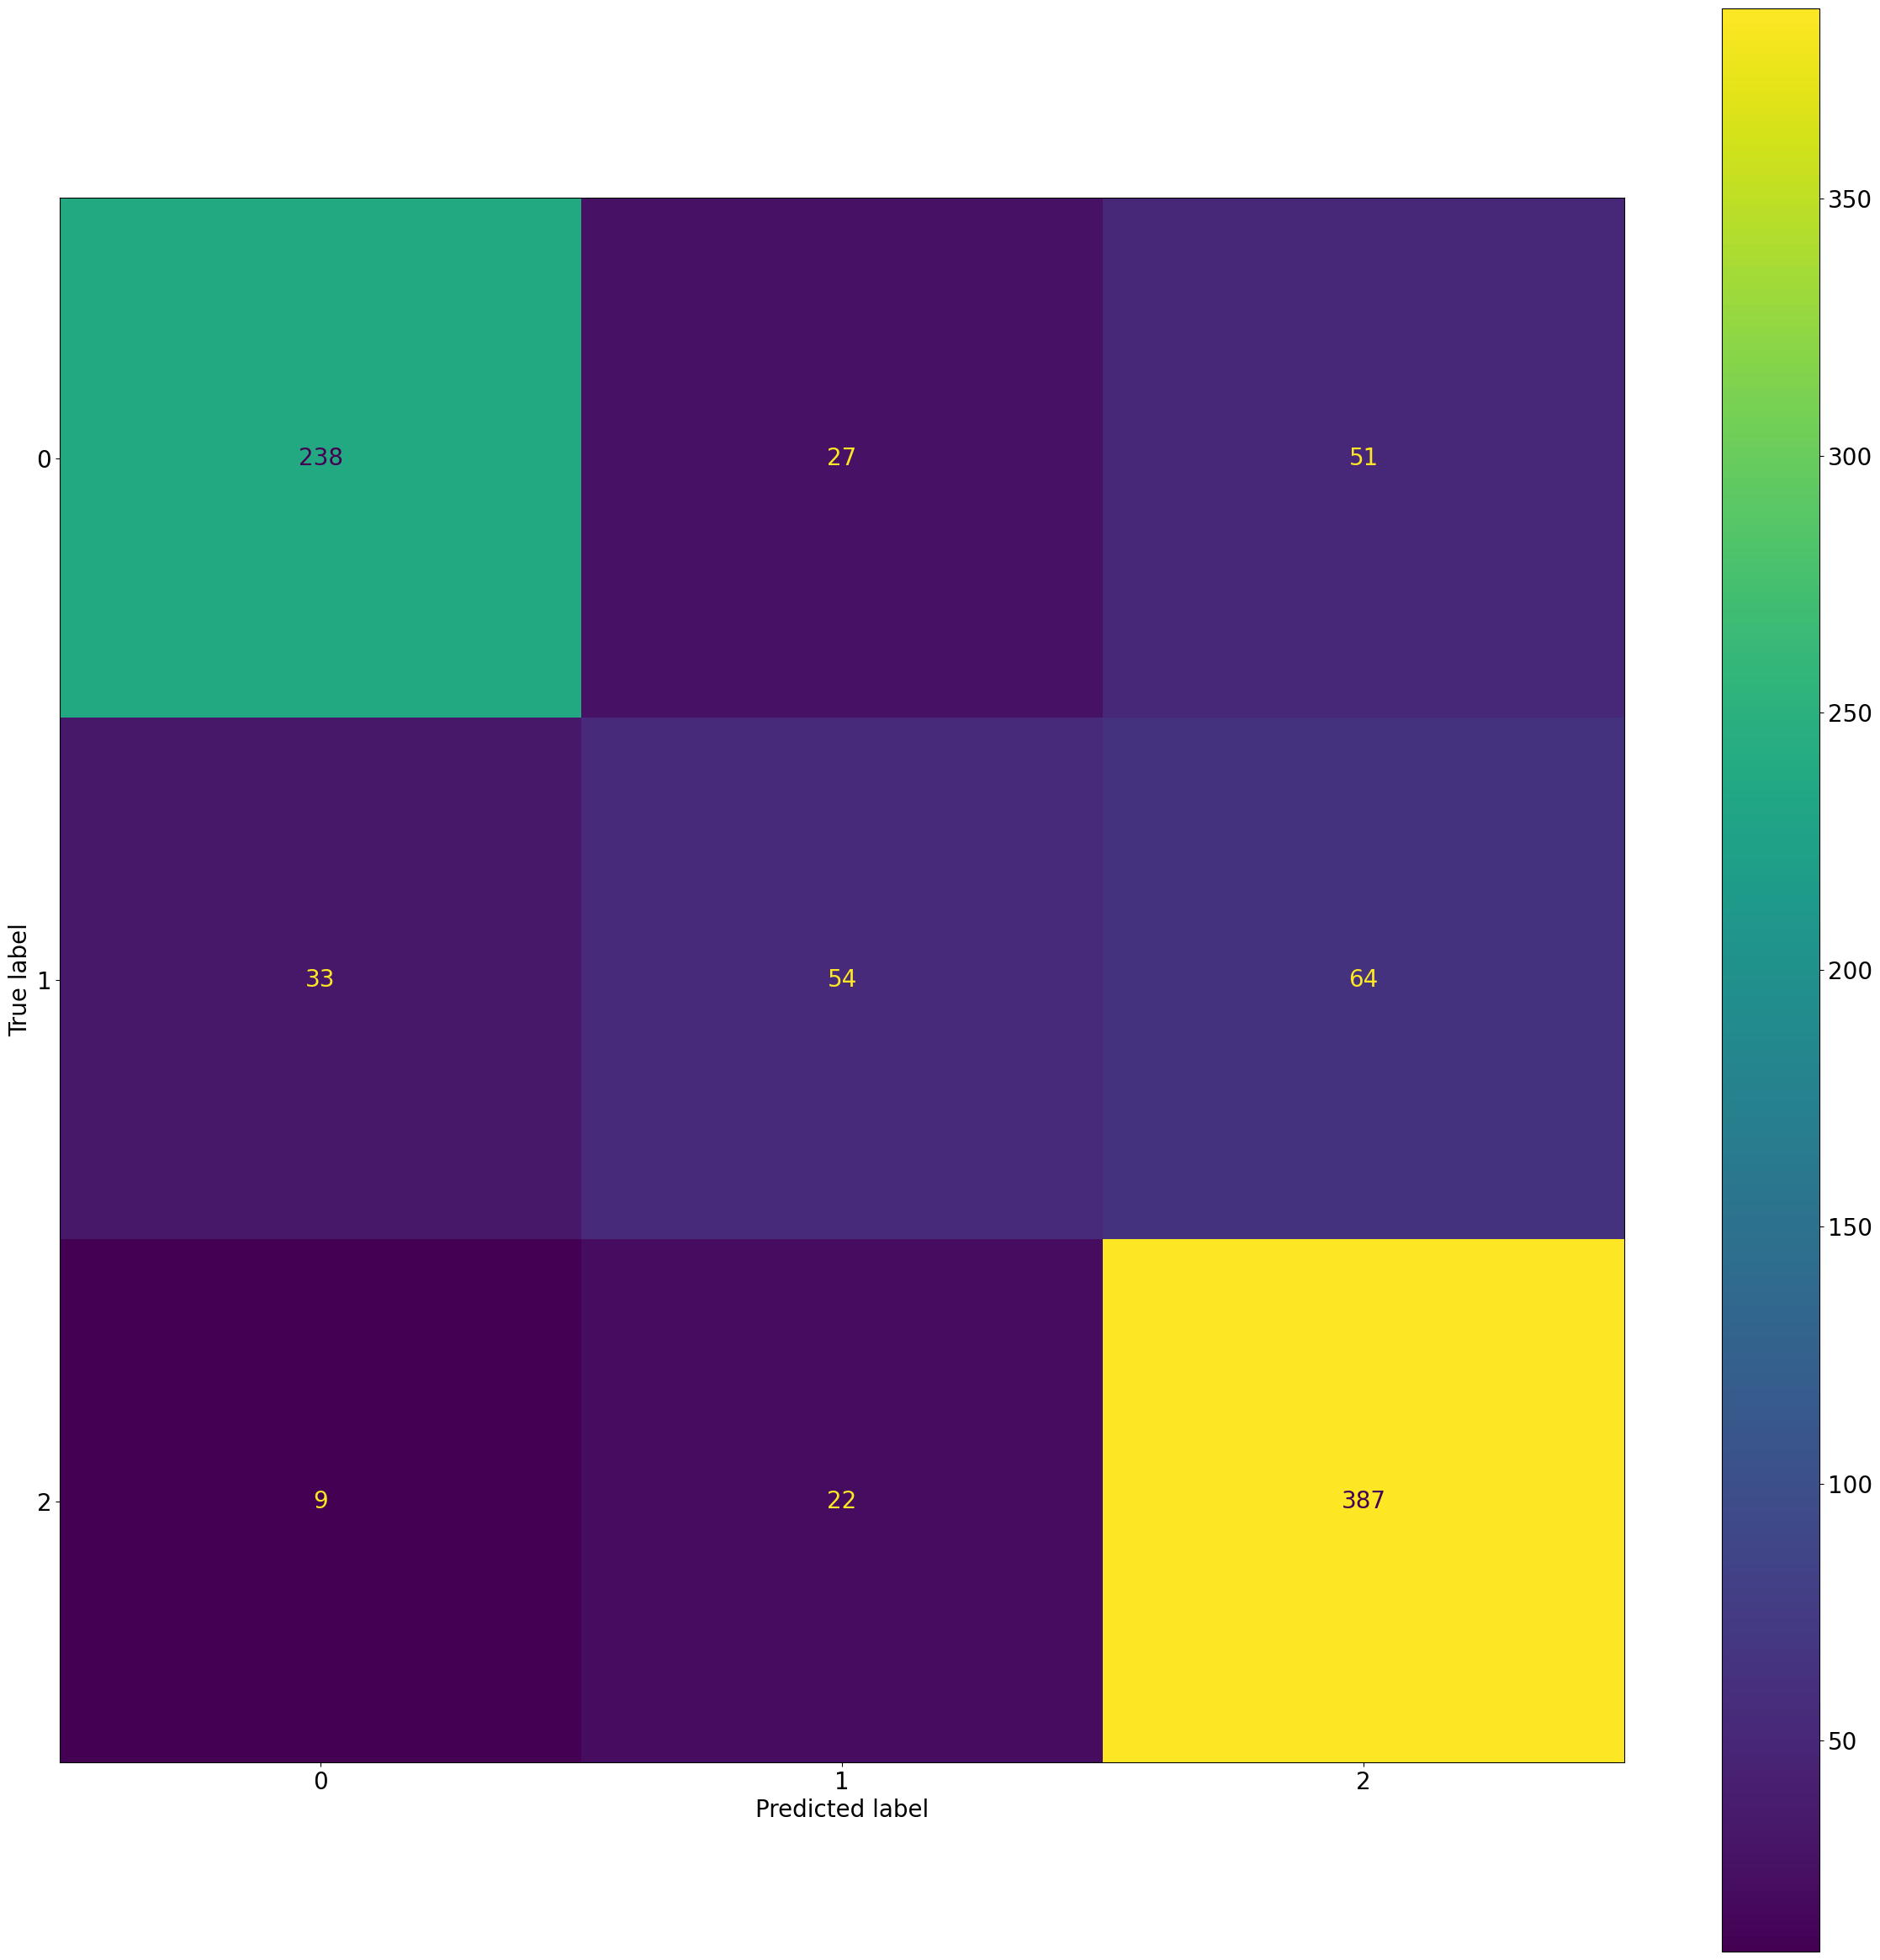

In [84]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

### Datos con balanceado Tomek

In [85]:
modelXGB.fit(X_train_balancedTomek, y_train_balancedTomek)
y_predT = modelXGB.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predT))
print('Precision score: ', precision_score(y_test, y_predT, average='macro'))
print('Recall score: ', recall_score(y_test, y_predT, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predT, average='macro'))

print(classification_report(y_test, y_predT))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:08:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7548022598870057
Precision score:  0.6981552165773869
Recall score:  0.6800940987498736
F1 Score:  0.6861497281176026
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       316
           1       0.47      0.41      0.44       151
           2       0.78      0.89      0.83       418

    accuracy                           0.75       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.75      0.75       885



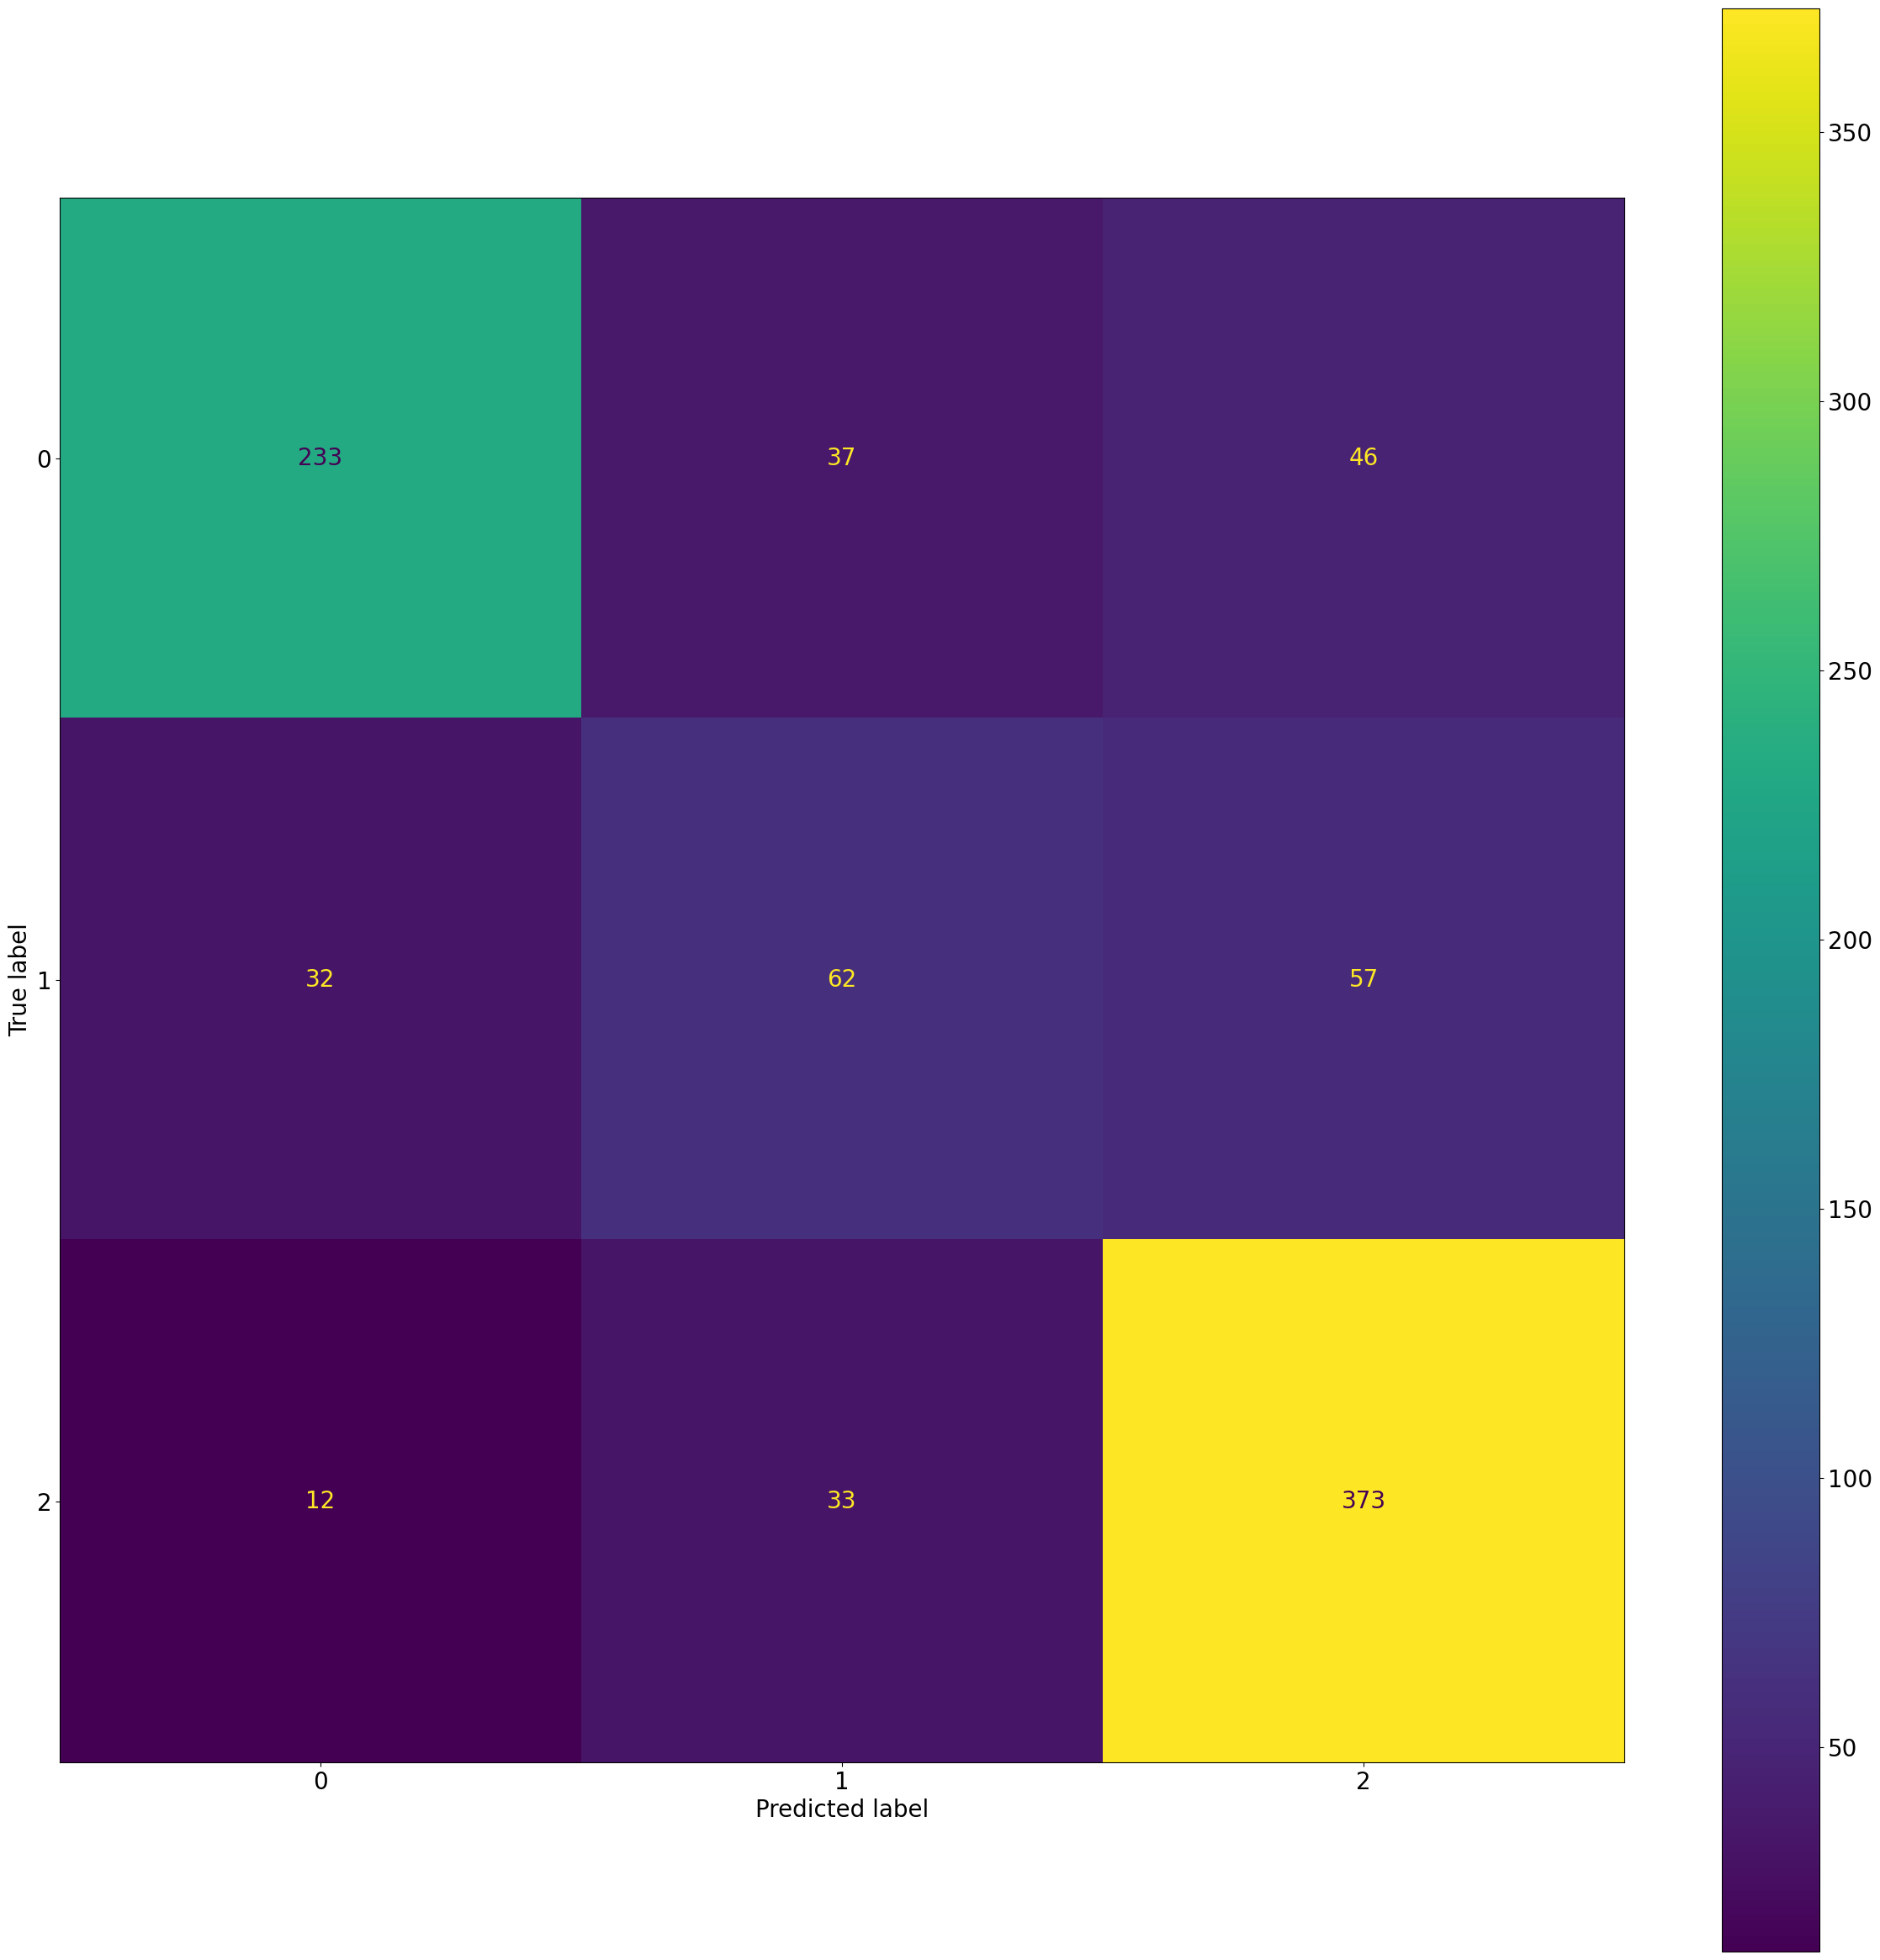

In [86]:
cm = confusion_matrix(y_test, y_predT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

# Fase 5: Demostración

In [87]:
print(df_datosUCIsignificativo.iloc[1])

Application mode                            15.000000
Course                                    9254.000000
Daytime/evening attendance\t                 1.000000
Previous qualification (grade)             160.000000
Mother's qualification                       1.000000
Father's qualification                       3.000000
Mother's occupation                          3.000000
Father's occupation                          3.000000
Admission grade                            142.500000
Tuition fees up to date                      0.000000
Gender                                       1.000000
Age at enrollment                           19.000000
Curricular units 1st sem (enrolled)          6.000000
Curricular units 1st sem (evaluations)       6.000000
Curricular units 1st sem (approved)          6.000000
Curricular units 1st sem (grade)            14.000000
Curricular units 2nd sem (enrolled)          6.000000
Curricular units 2nd sem (evaluations)       6.000000
Curricular units 2nd sem (ap

In [88]:
datosPrueba = (17,171,1,122,19,12,5,9,127.3,1,1,20,0,0,0,0,0,0,0,0,10.8,1.40,1.74)
df_datosPrueba = pd.DataFrame([datosPrueba], columns=X_train.columns)

In [90]:
prediccion = modelTomek.predict(df_datosPrueba)
print(prediccion)

[0]


In [91]:
datosPrueba2 = (15,9254,1,160,1,3,3,3,142,0,1,19,6,6,6,14,6,6,6,13.666,13.90,-0.3,0.79)
df_datosPrueba2 = pd.DataFrame([datosPrueba2], columns=X_train.columns)

In [92]:
prediccion2 = modelTomek.predict(df_datosPrueba2)
print(prediccion2)

[0]


In [119]:
import pandas as pd

data = {
    "Application mode": [1, 2, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51],
    "Course": [9119] * 14,
    "Daytime/evening attendance\t": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    "Previous qualification (grade)": [120, 85, 110, 150, 75, 140, 95, 130, 119, 96, 158, 132, 108, 88],
    "Mother's qualification": [2, 6, 3, 4, 1, 5, 9, 2, 4, 10, 12, 3, 1, 10],
    "Father's qualification": [5, 14, 20, 30, 12, 25, 27, 11, 21, 32, 29, 19, 39, 19],
    "Mother's occupation": [4, 1, 6, 3, 0, 2, 4, 7, 3, 1, 6, 5, 4, 3],
    "Father's occupation": [1, 90, 101, 132, 11, 122, 143, 9, 192, 151, 101, 4, 192, 152],
    "Admission grade": [150, 130, 165, 178, 98, 100, 160, 145, 137, 120, 155, 139, 172, 111],
    "Tuition fees up to date": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    "Gender": [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    "Age at enrollment": [24, 22, 20, 19, 26, 28, 30, 21, 23, 29, 24, 30, 25, 27],
    "Curricular units 1st sem (enrolled)": [5, 4, 6, 7, 8, 3, 6, 5, 4, 7, 6, 8, 2, 4],
    "Curricular units 1st sem (evaluations)": [4, 3, 5, 7, 7, 3, 5, 4, 4, 7, 6, 8, 2, 3],
    "Curricular units 1st sem (approved)": [3, 2, 4, 5, 7, 2, 4, 4, 3, 5, 6, 6, 2, 2],
    "Curricular units 1st sem (grade)": [17, 15, 18, 19, 16, 14, 15, 18, 19, 20, 17, 14, 19, 16],
    "Curricular units 2nd sem (enrolled)": [6, 3, 5, 4, 2, 3, 2, 3, 5, 1, 5, 0, 6, 1],
    "Curricular units 2nd sem (evaluations)": [5, 2, 4, 3, 2, 3, 2, 2, 4, 1, 4, 0, 6, 1],
    "Curricular units 2nd sem (approved)": [4, 1, 3, 2, 2, 4, 1, 2, 3, 1, 3, 0, 5, 1],
    "Curricular units 2nd sem (grade)": [10.5, 12.0, 8.4, 14.0, 11.2, 15.6, 10.1, 12.5, 9.9, 13.0, 11.3, 13.5, 7.3, 10.6],
    "Unemployment rate": [2.3, 3.5, 4.2, 1.0, 3.8, 0.8, 1.5, 4.5, 2.2, 3.9, 1.8, 0.5, 4.0, 3.4],
    "Inflation rate": [75000, 62000, 80000, 89000, 66000, 72000, 84000, 70000, 83000, 55000, 95000, 58000, 78000, 63000],
    "GDP": [75000, 62000, 80000, 89000, 66000, 72000, 84000, 70000, 83000, 55000, 95000, 58000, 78000, 63000],
}

df_GENAI = pd.DataFrame(data)

df_GENAI


Application mode  Course  Daytime/evening attendance\t  \
0                  1    9119                             1   
1                  2    9119                             0   
2                 10    9119                             1   
3                 15    9119                             0   
4                 16    9119                             1   
5                 17    9119                             0   
6                 18    9119                             1   
7                 26    9119                             0   
8                 27    9119                             1   
9                 39    9119                             0   
10                42    9119                             1   
11                43    9119                             0   
12                44    9119                             1   
13                51    9119                             0   

    Previous qualification (grade)  Mother's qualification  \
0                              120                       2   
1                               85                       6   
2                              110                       3   
3                              150                       4   
4                               75                       1   
5                              140                       5   
6                               95                       9   
7                              130                       2   
8                              119                       4   
9                               96                      10   
10                             158                      12   
11                             132                       3   
12                             108                       1   
13                              88                      10   

    Father's qualification  Mother's occupation  Father's occupation  \
0                        5                    4                    1   
1                       14                    1                   90   
2                       20                    6                  101   
3                       30                    3                  132   
4                       12                    0                   11   
5                       25                    2                  122   
6                       27                    4                  143   
7                       11                    7                    9   
8                       21                    3                  192   
9                       32                    1                  151   
10                      29                    6                  101   
11                      19                    5                    4   
12                      39                    4                  192   
13                      19                    3                  152   

    Admission grade  Tuition fees up to date  ...  \
0               150                        1  ...   
1               130                        0  ...   
2               165                        1  ...   
3               178                        0  ...   
4                98                        1  ...   
5               100                        0  ...   
6               160                        1  ...   
7               145                        0  ...   
8               137                        1  ...   
9               120                        0  ...   
10              155                        1  ...   
11              139                        0  ...   
12              172                        1  ...   
13              111                        0  ...   

    Curricular units 1st sem (evaluations)  \
0                                        4   
1                                        3   
2                                        5   
3                                        7   
4                                  

In [131]:
df_GENAI.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        14 non-null     int64  
 1   Course                                  14 non-null     int64  
 2   Daytime/evening attendance	             14 non-null     int64  
 3   Previous qualification (grade)          14 non-null     int64  
 4   Mother's qualification                  14 non-null     int64  
 5   Father's qualification                  14 non-null     int64  
 6   Mother's occupation                     14 non-null     int64  
 7   Father's occupation                     14 non-null     int64  
 8   Admission grade                         14 non-null     int64  
 9   Tuition fees up to date                 14 non-null     int64  
 10  Gender                                  14 non-null     int64  


In [122]:
# Escalar todo el dataset
df_GENAI_scaled, scaler = scale_data(df_GENAI)

In [125]:
# Predicción para todos los datos escalados
predicciones = modelTomek.predict(df_GENAI_scaled)
print(predicciones)



[0 0 1 1 2 0 1 0 1 0 1 0 0 0]
